In [1]:
from database import Database
from Filter.PB import PB
from Filter.MA import MA
from Filter.PB_MA import PB_MA
from Filter.Higher_Market import Higher_Market
from Filter.DoubleRateRise import DoubleRateRise
from Filter.ROE_H_PB_L import ROE_H_PB_L
from Filter.Chips import Chips
from Filter.GetFilterData import GetFilterData
from Utils.GetExtraX import GetExtraX
from FeatureSelect.FeatureSelect import FeatureSelect
from FeatureSelect.FeatureXMLGenerate import FeatureXMLGenerate
from Draw.StockDataVisualizer import StockDataVisualizer
from Draw.FeatureVisualizer import FeatureVisualizer

In [2]:
class DataStorage:
    def __init__(self):
        self.filtered_data = None
        self.features = None

In [3]:
def Analysis(func_name,start_d,end_d,*xml):
    data_storage = DataStorage()
    # 讀取資料
    db = Database()
    # #TODO:一次取完變成data?
    # stock_data = db.get_stock(start_d,end_d).drop('id', axis=1)
    company_data =db.get_company_basic()
    q_data=db.get_finance_report_q()
    m_data=db.get_finance_report_m()
    s_data = db.get_stock(start_d,end_d)
    mk_data = db.get_market_index(start_d,end_d)
    ch_data = db.get_chips(start_d,end_d)

    #選擇策略+防呆
    if func_name == "F_PB":
        selected_companies = PB(q_data)

    elif func_name == "F_DoubleRateRise":
        selected_companies = DoubleRateRise(q_data,start_d)
        
    elif func_name == "F_Chips":
        selected_companies = Chips(ch_data,*xml)

    elif func_name == "F_MA":
        selected_companies = MA(s_data)

    elif func_name == "F_PB_MA":
        selected_companies = PB_MA(q_data,start_d,s_data)
        
    elif func_name == "F_Higher_Market":
        selected_companies = Higher_Market(s_data,company_data,mk_data,start_d,end_d)

    elif func_name == "F_ROE_H_PB_L":
        selected_companies = ROE_H_PB_L(q_data,company_data)

    else:
        return "請選擇合適篩選標準"
    print(len(selected_companies))
    print(selected_companies)
    combine = GetFilterData(company_data,m_data,q_data,s_data,mk_data,ch_data,selected_companies,start_d,end_d)
    filtered_data=combine.getFliterData()

    import pandas as pd
    with pd.ExcelWriter('filtered_data.xlsx', engine='openpyxl') as writer:
        filtered_data.to_excel(writer, index=False, sheet_name='Sheet1')
    
    print(f"符合條件股數:{len(filtered_data)}")

    visualizer = StockDataVisualizer(filtered_data)
    visualizer.get_heat_map_all()
    visualizer.get_industry_pie_all()
    visualizer.get_bar_chart_all()
   
    if xml:
        addX_data = GetExtraX(filtered_data,xml[0])
    else:
        addX_data = filtered_data

    features = FeatureSelect(addX_data)

    FeatureXMLGenerate(features)
    
    data_storage.features, data_storage.filtered_data = features, filtered_data
    return features, filtered_data
    

c:\Users\User\Desktop\中央資管\論文\自己的論文\Data_Browsing\database.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_from_db[columns_to_fill] = filtered_df_from_db[columns_to_fill].fillna(0)


28
[1319, 1467, 2357, 2363, 2383, 2387, 2460, 2645, 3043, 3044, 3051, 3078, 3308, 3567, 3587, 3596, 3617, 3622, 4906, 4909, 4967, 5469, 6122, 6191, 6418, 6799, 8050, 9934]
符合條件股數:28


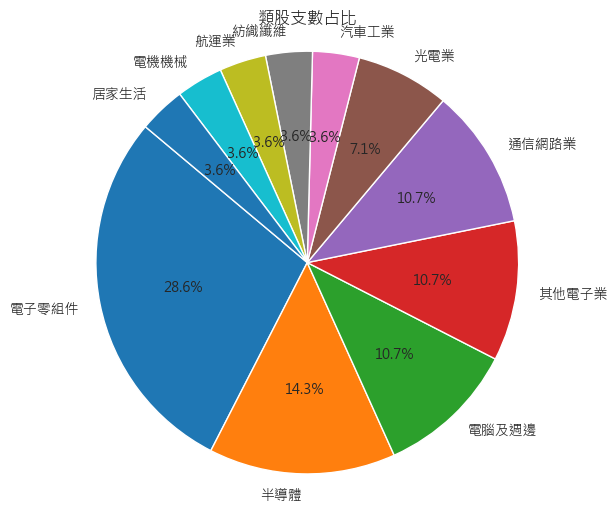

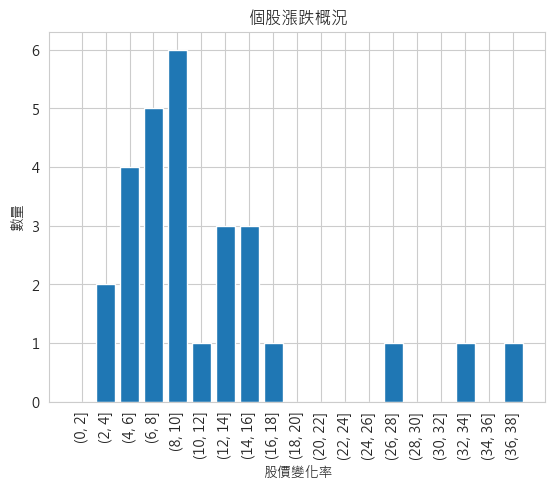

營業利益變動率
營業利益成長率
分析起日-800-1000張(比率)
稅前淨利成長率
產業名稱
{'營業利益變動率': '數值', '營業利益成長率': '數值', '分析起日-800-1000張(比率)': '數值', '稅前淨利成長率': '數值', '產業名稱': '類別'}


In [4]:

# features, filtered_data = Analysis("F_DoubleRateRise",'2023/04/01','2023/07/01','XML_chip1031.xml')
#可行的(收盤)
# features, filtered_data = Analysis("F_DoubleRateRise",'2023/04/01','2023/06/30')#沒有很明顯
# features, filtered_data = Analysis("F_DoubleRateRise",'2023/05/16','2023/06/16')#沒有很明顯
# features, filtered_data = Analysis("F_DoubleRateRise",'2023/05/16','2023/05/31')
# features, filtered_data = Analysis("F_DoubleRateRise",'2023/05/16','2023/09/16','experiment1.xml')#實驗一
# features, filtered_data = Analysis("F_Chips",'2023/05/16','2023/05/31','experiment2.xml')#實驗二
# features, filtered_data = Analysis("F_Higher_Market",'2023/05/16','2023/10/16')#這濾網不能用
# features, filtered_data = Analysis("F_PB_MA",'2023/05/16','2023/08/16')#失敗
# features, filtered_data = Analysis("F_MA",'2023/05/16','2023/05/31')#不明顯
features, filtered_data = Analysis("F_MA",'2023/08/15','2023/08/21')#實驗三
# features, filtered_data = Analysis("F_ROE_H_PB_L",'2023/05/16','2023/08/15')#失敗
# features, filtered_data = Analysis("F_ROE_H_PB_L",'2023/05/16','2023/06/15')#失敗
# features, filtered_data = Analysis("F_DoubleRateRise",'2023/05/16','2023/08/16')#失敗
# features, filtered_data = Analysis("F_PB", '2023/05/16', '2023/06/15')#失敗
#有bug



#不可行

# features, filtered_data = Analysis("F_Higher_Market",'2023/05/16','2023/07/17')# 換成3*3
# features, filtered_data = Analysis("F_DoubleRateRise",'2023/05/16','2023/07/17')#5


#features, filtered_data = Analysis("F_PB_MA",'2023/08/15','2023/10/16')#5



# 執行 Analysis 函式



In [5]:
# filtered_data.to_csv('filtered_data.csv', index=False, encoding='utf-8')

In [6]:
# F_Draw(filtered_data,features,'v1TestXML1030.xml')

<Figure size 640x480 with 0 Axes>

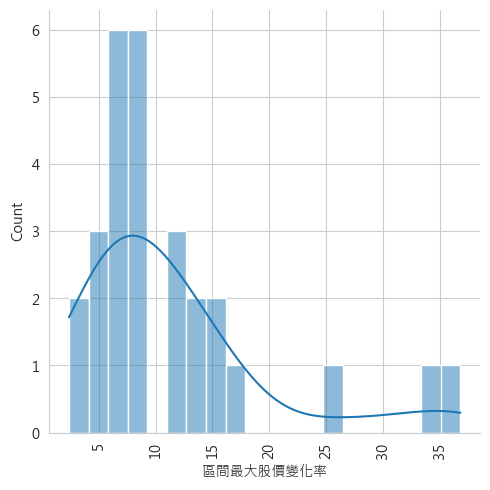

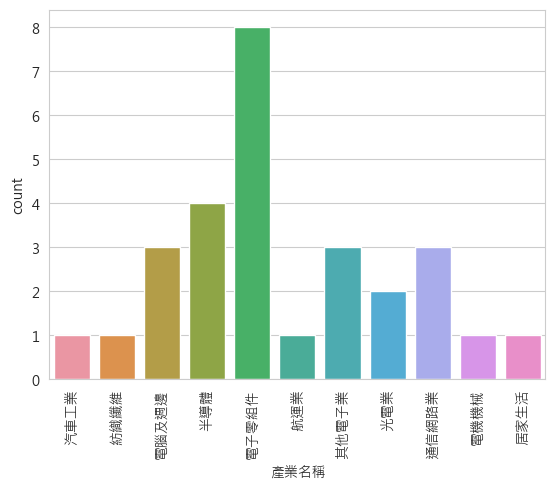

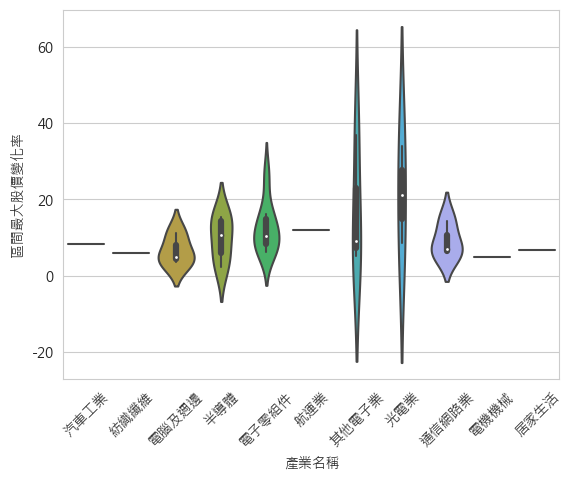

<Figure size 1000x600 with 0 Axes>

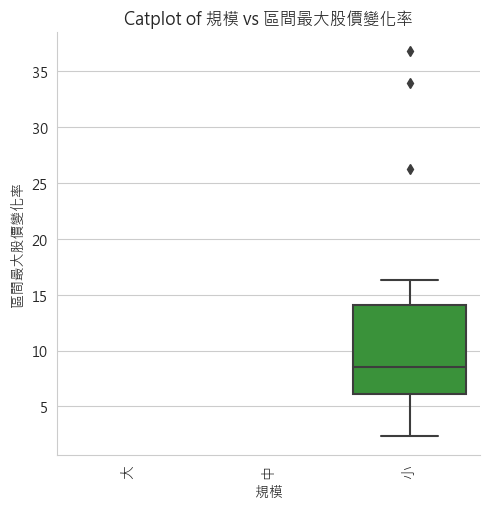

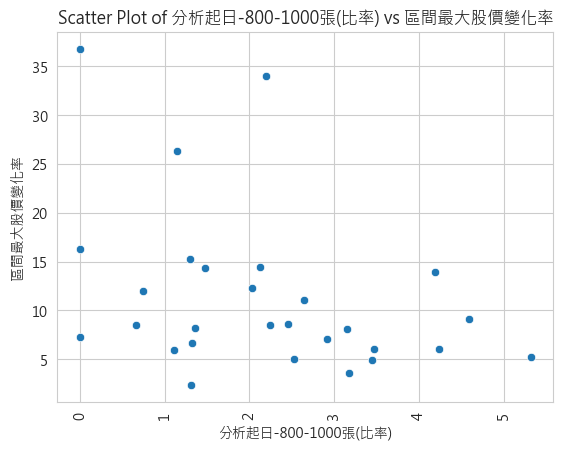

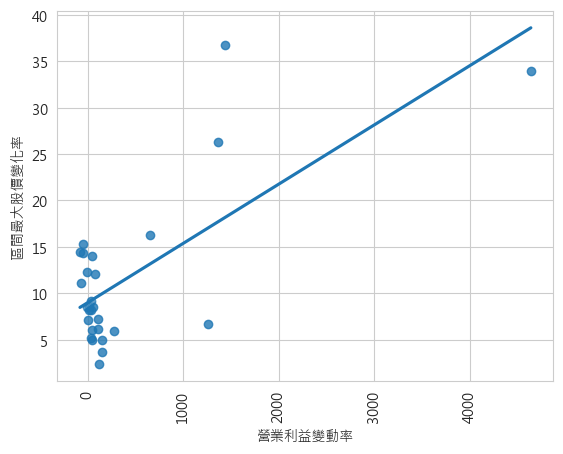

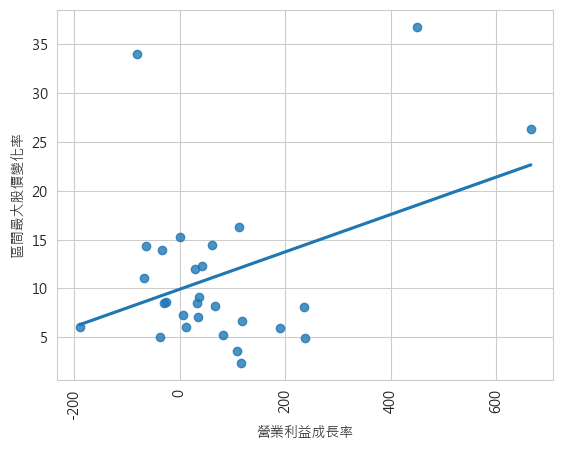

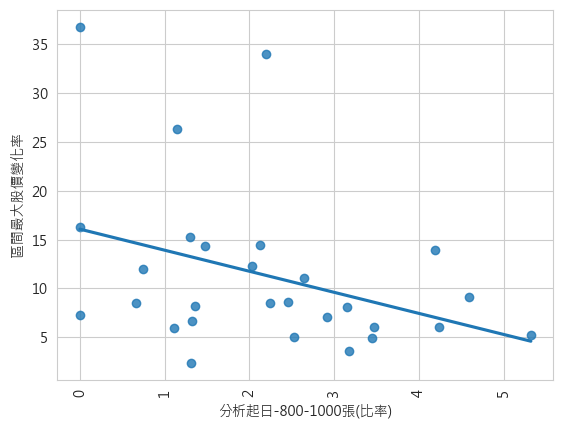

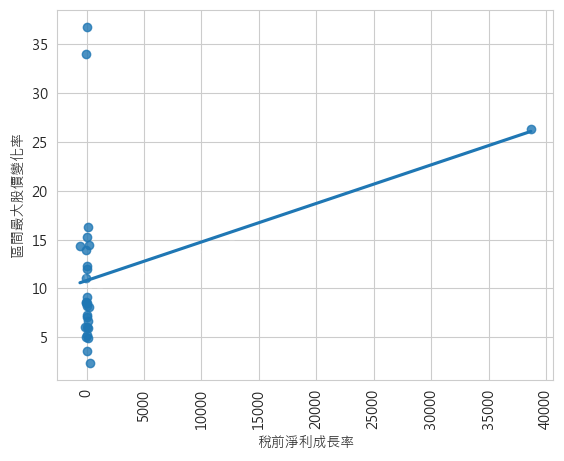

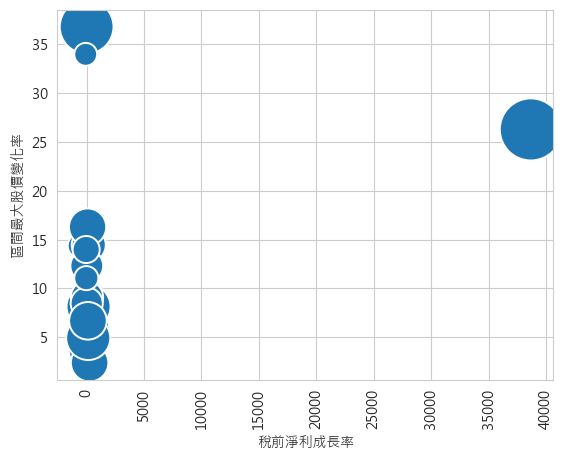

<Figure size 640x480 with 0 Axes>

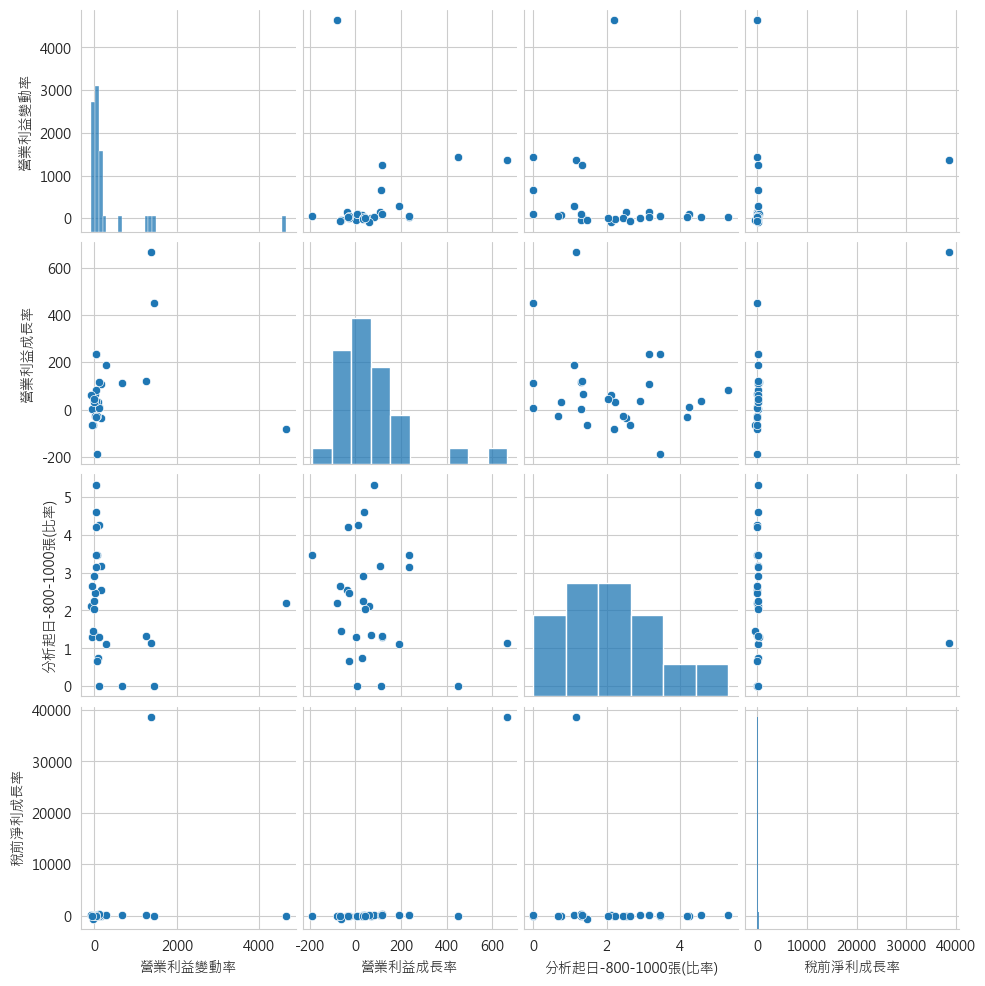

In [7]:
VisualizationEngine= FeatureVisualizer(filtered_data,features,'xml/stock_analysis.xml')
# #畫單一圖
VisualizationEngine.SingleFeaturesVisualizer()

combinations_list
[('營業利益變動率', '營業利益成長率', '分析起日-800-1000張(比率)'), ('營業利益變動率', '營業利益成長率', '稅前淨利成長率'), ('營業利益變動率', '營業利益成長率', '產業名稱'), ('營業利益變動率', '分析起日-800-1000張(比率)', '稅前淨利成長率'), ('營業利益變動率', '分析起日-800-1000張(比率)', '產業名稱'), ('營業利益變動率', '稅前淨利成長率', '產業名稱'), ('營業利益成長率', '分析起日-800-1000張(比率)', '稅前淨利成長率'), ('營業利益成長率', '分析起日-800-1000張(比率)', '產業名稱'), ('營業利益成長率', '稅前淨利成長率', '產業名稱'), ('分析起日-800-1000張(比率)', '稅前淨利成長率', '產業名稱')]
final_combinations
[('營業利益變動率', '營業利益成長率', '分析起日-800-1000張(比率)'), ('營業利益成長率', '分析起日-800-1000張(比率)', '營業利益變動率'), ('分析起日-800-1000張(比率)', '營業利益變動率', '營業利益成長率'), ('營業利益變動率', '營業利益成長率', '稅前淨利成長率'), ('營業利益成長率', '稅前淨利成長率', '營業利益變動率'), ('稅前淨利成長率', '營業利益變動率', '營業利益成長率'), ('營業利益變動率', '營業利益成長率', '產業名稱'), ('營業利益成長率', '產業名稱', '營業利益變動率'), ('產業名稱', '營業利益變動率', '營業利益成長率'), ('營業利益變動率', '分析起日-800-1000張(比率)', '稅前淨利成長率'), ('分析起日-800-1000張(比率)', '稅前淨利成長率', '營業利益變動率'), ('稅前淨利成長率', '營業利益變動率', '分析起日-800-1000張(比率)'), ('營業利益變動率', '分析起日-800-1000張(比率)', '產業名稱'), ('分析起日-800-1000張(比率)', '產業名稱', '營業利益變動率'), 

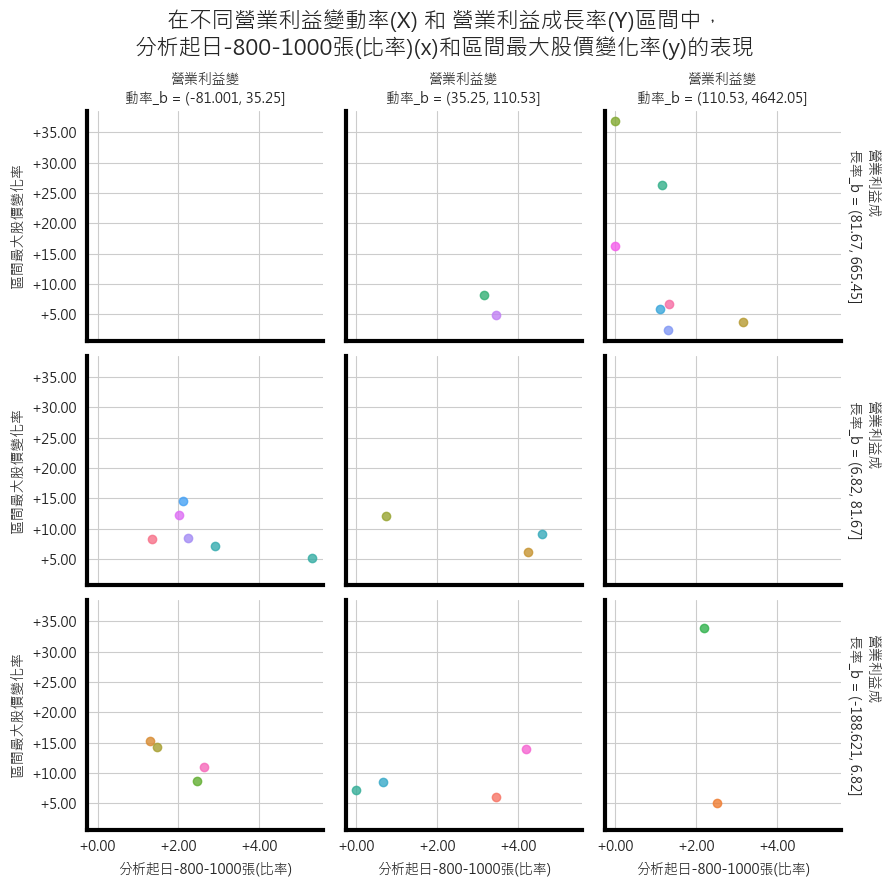

營業利益成
長率_b
分析起日-
800-1000張(比率)_b


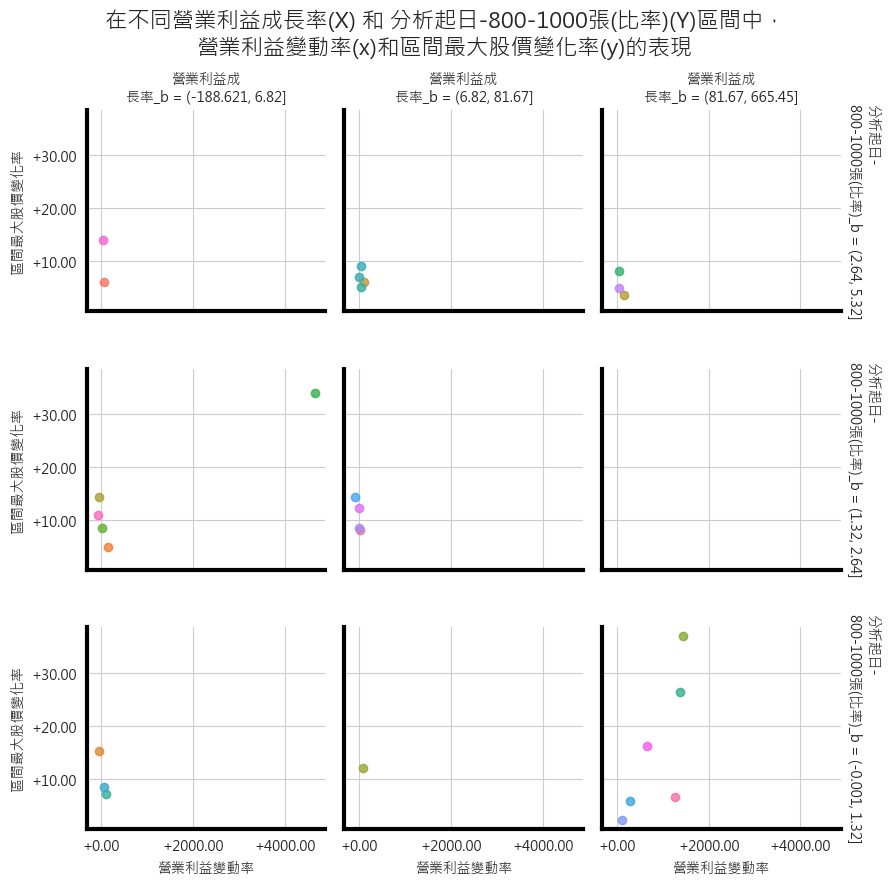

分析起日-
800-1000張(比率)_b
營業利益變
動率_b


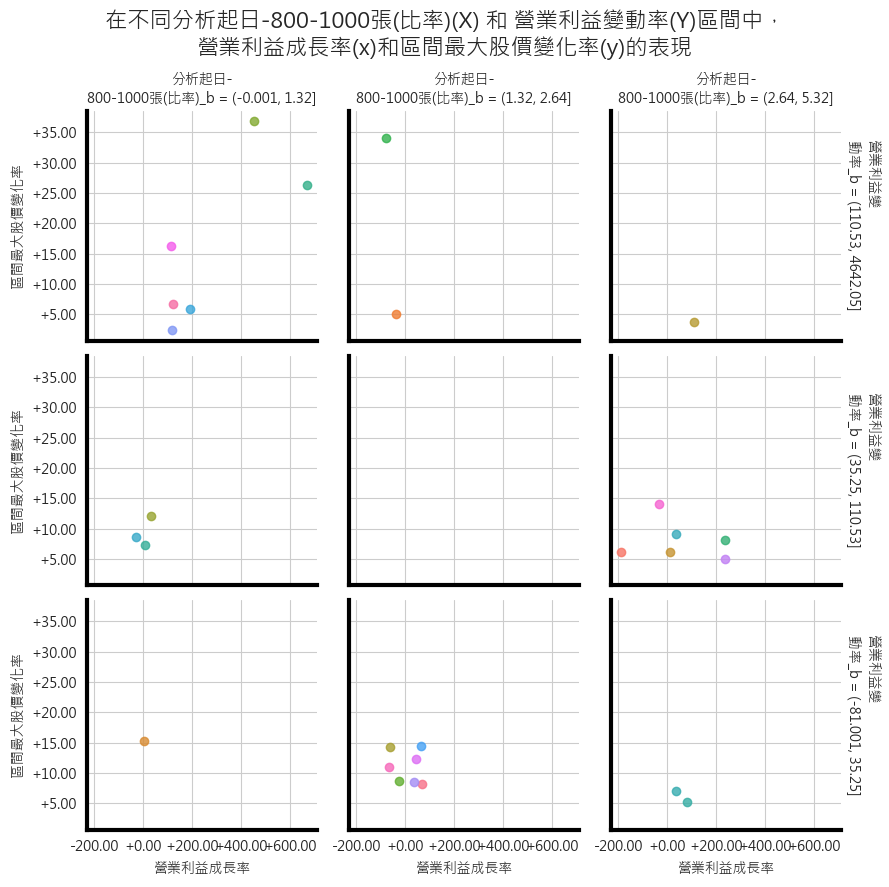

營業利益變
動率_b
營業利益成
長率_b


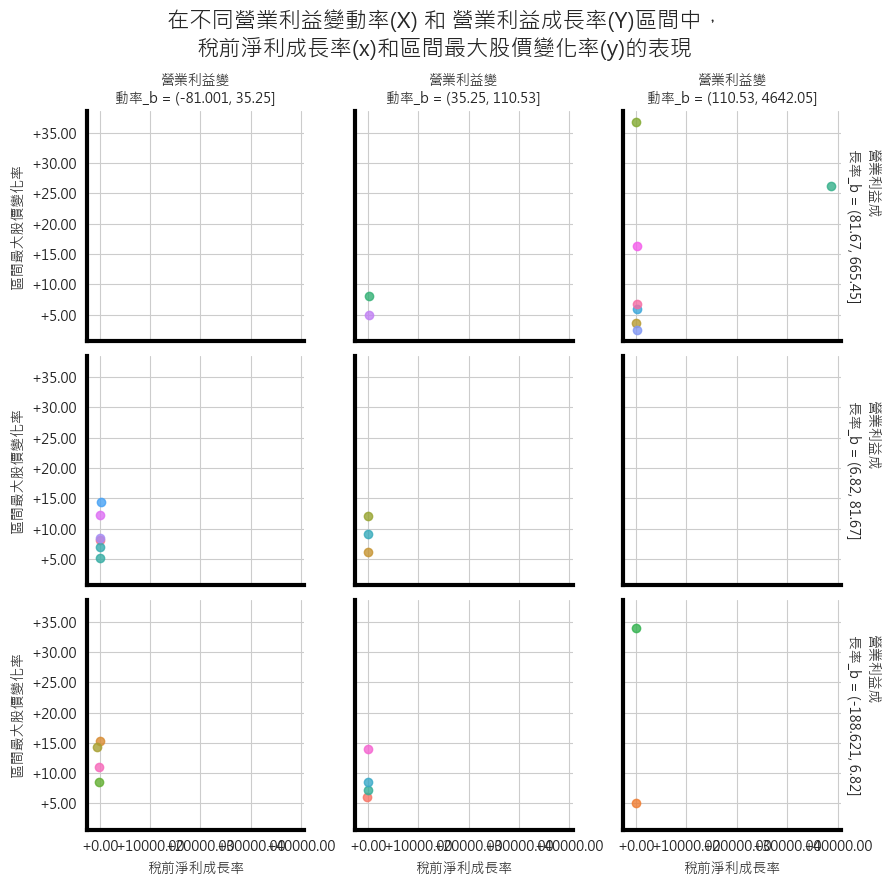

營業利益成
長率_b
稅前淨利成
長率_b


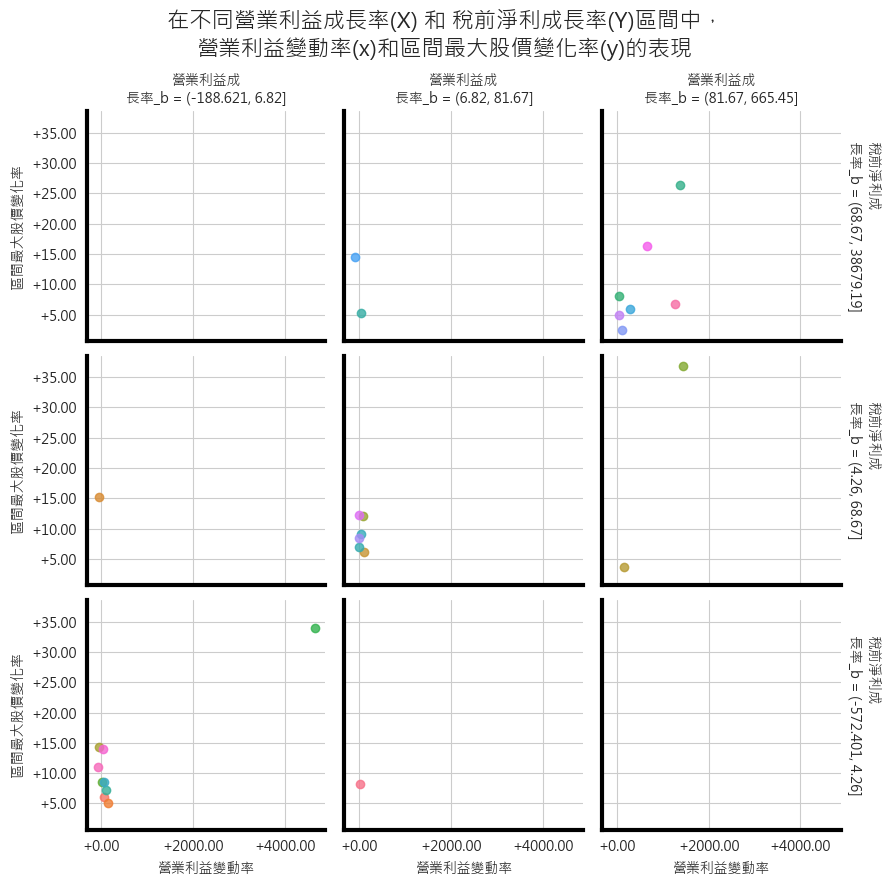

稅前淨利成
長率_b
營業利益變
動率_b


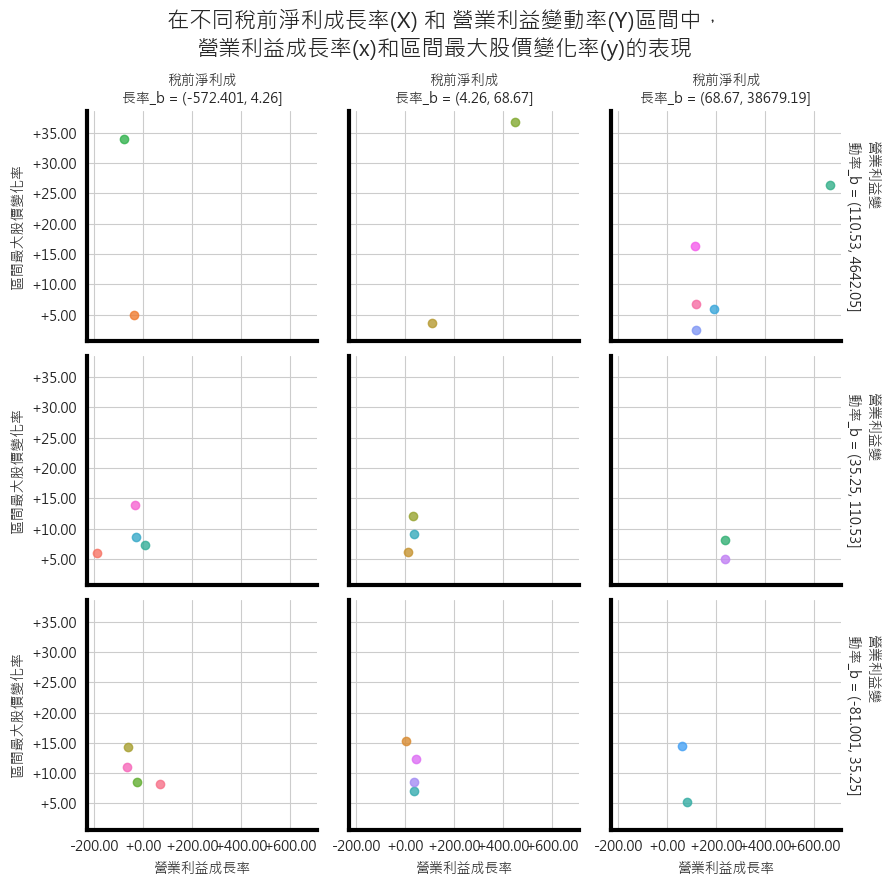

營業利益成
長率_b
產業名稱_
b


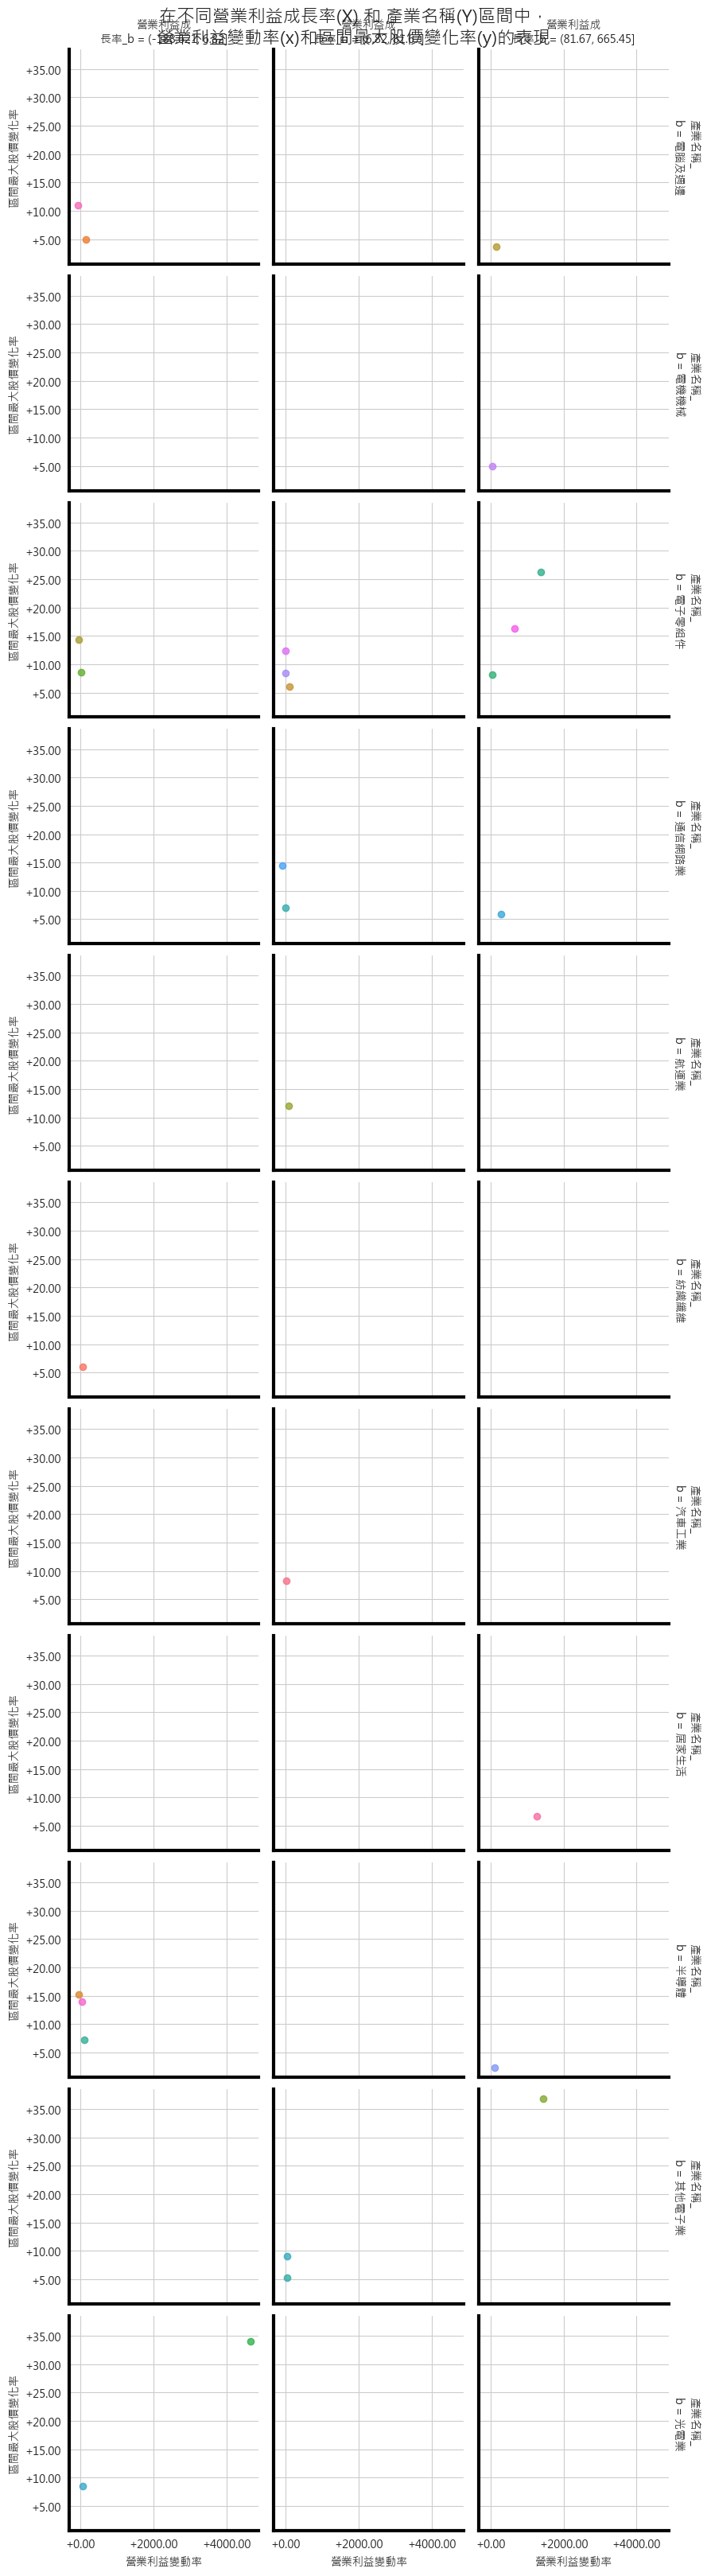

產業名稱_
b
營業利益變
動率_b


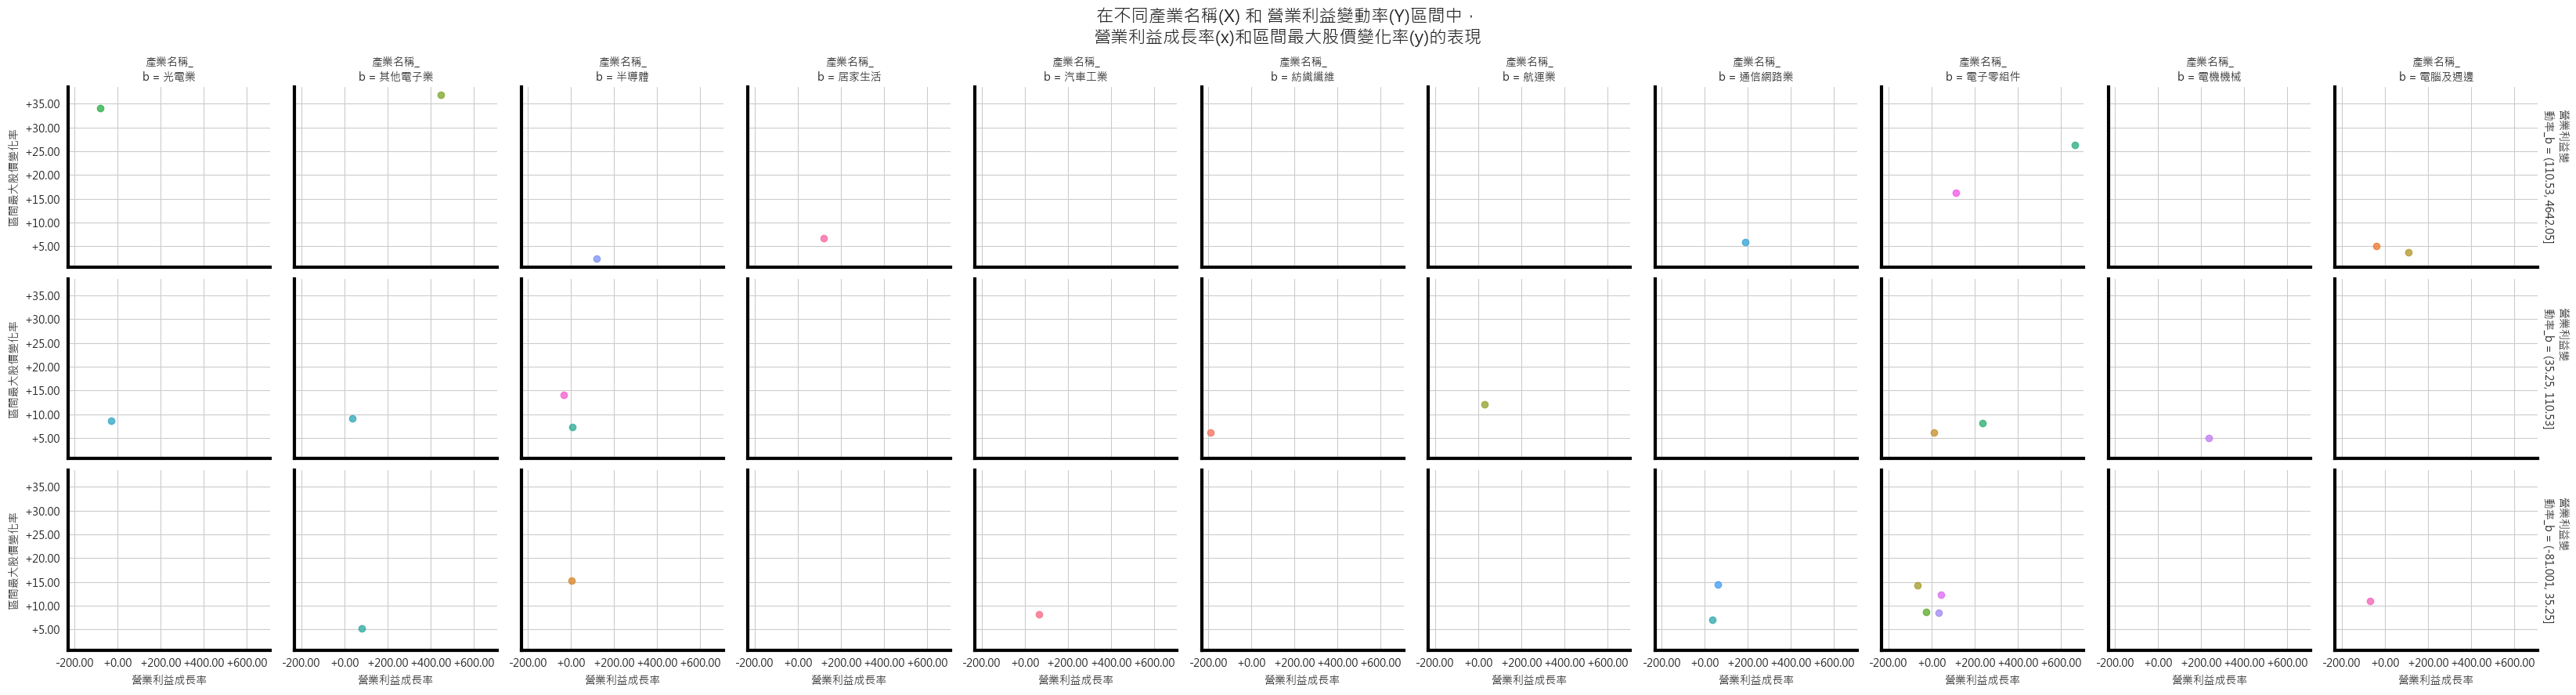

營業利益變
動率_b
分析起日-
800-1000張(比率)_b


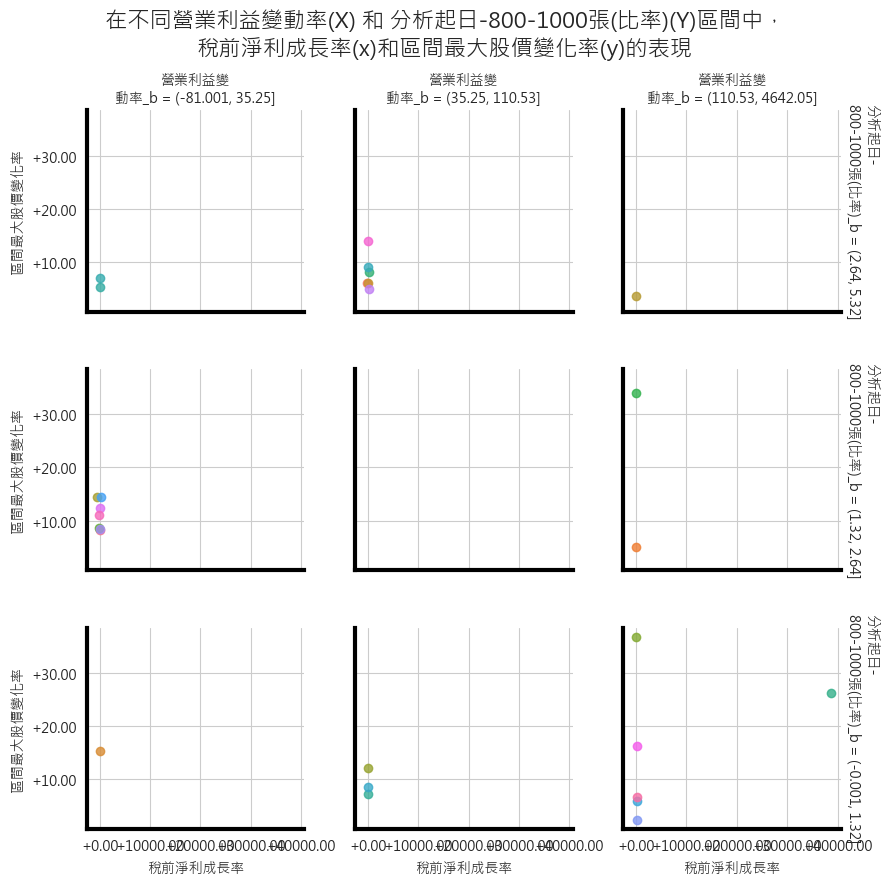

分析起日-
800-1000張(比率)_b
稅前淨利成
長率_b


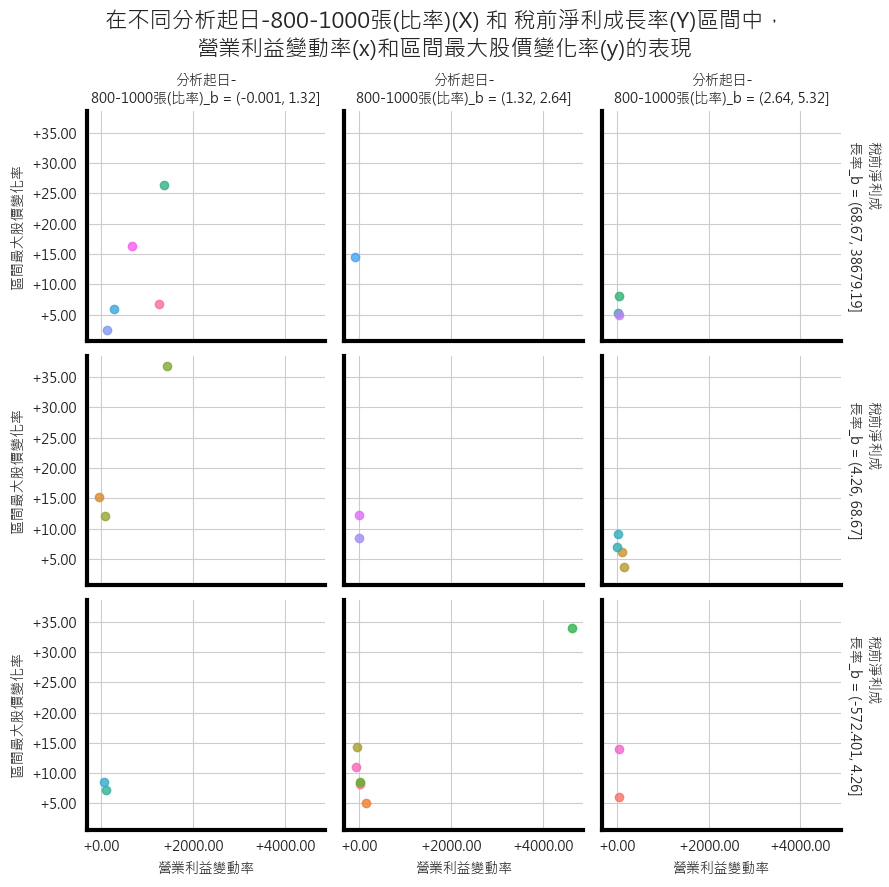

稅前淨利成
長率_b
營業利益變
動率_b


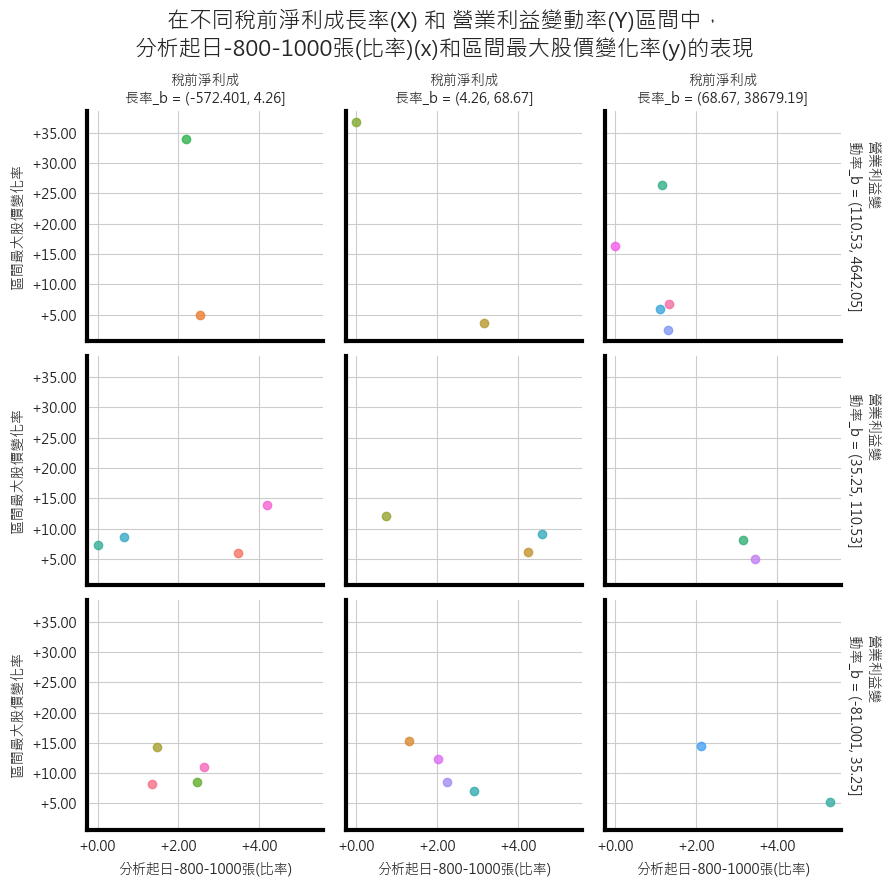

分析起日-
800-1000張(比率)_b
產業名稱_
b


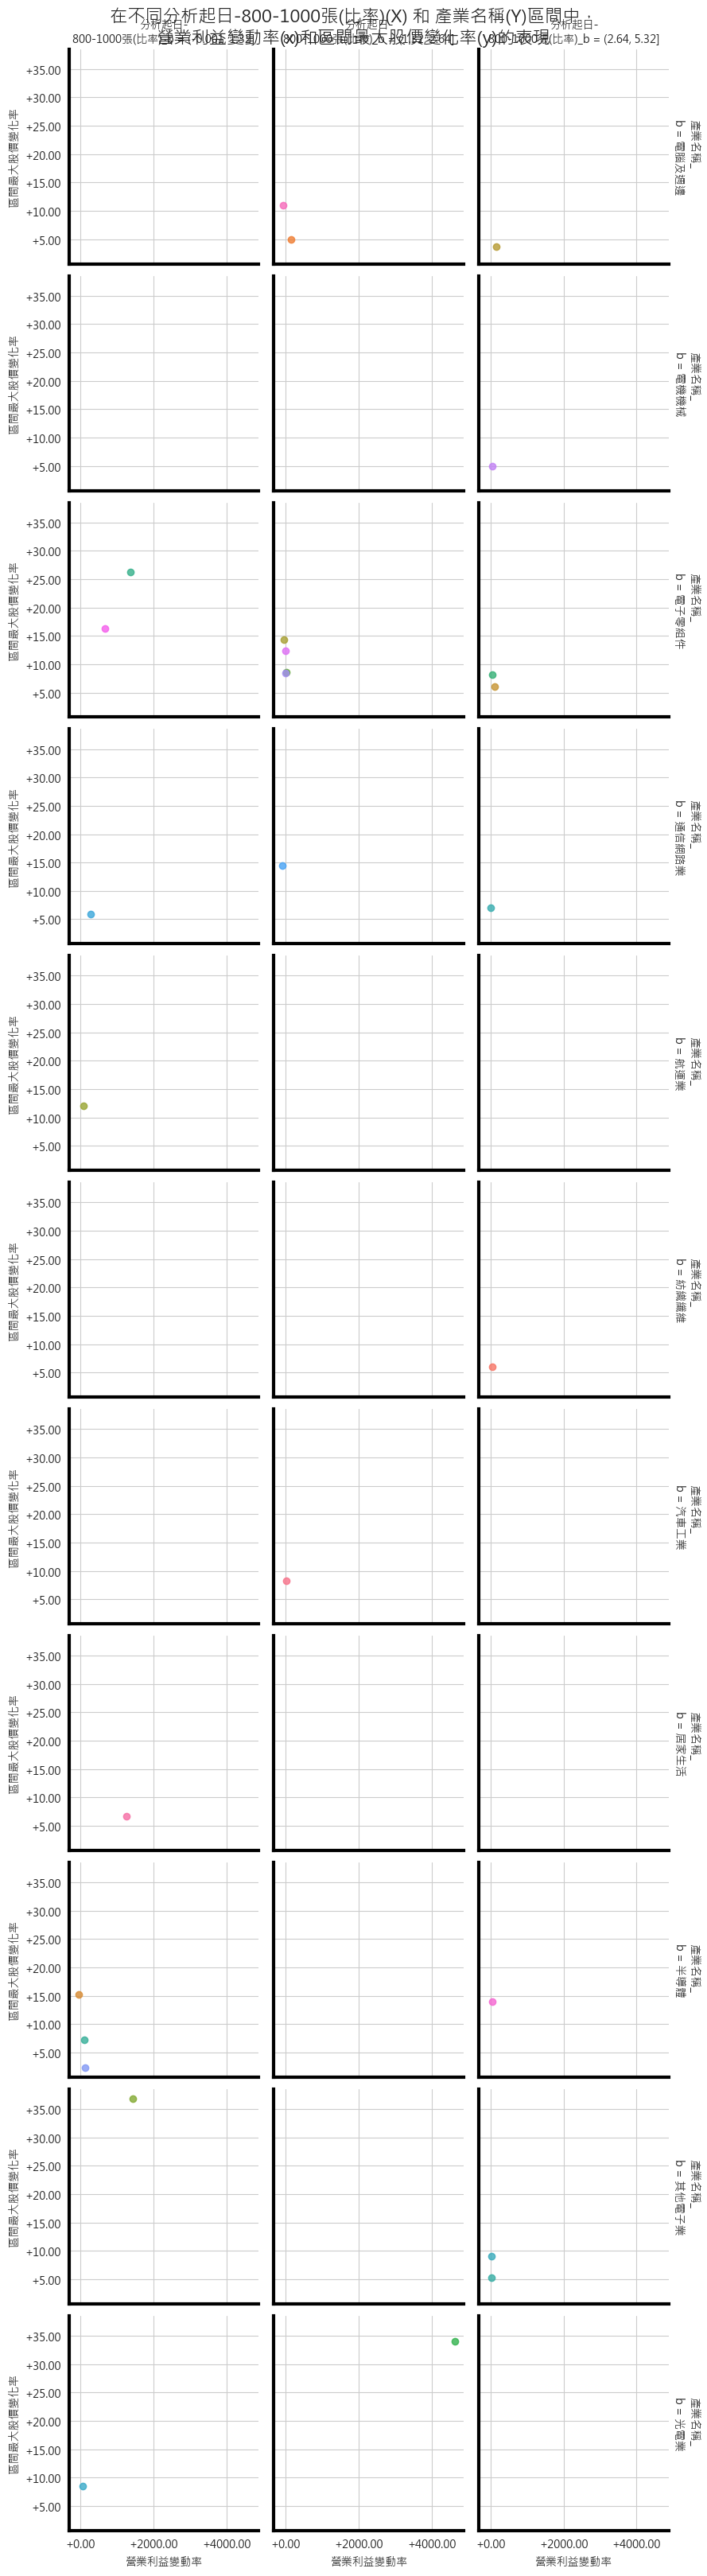

產業名稱_
b
營業利益變
動率_b


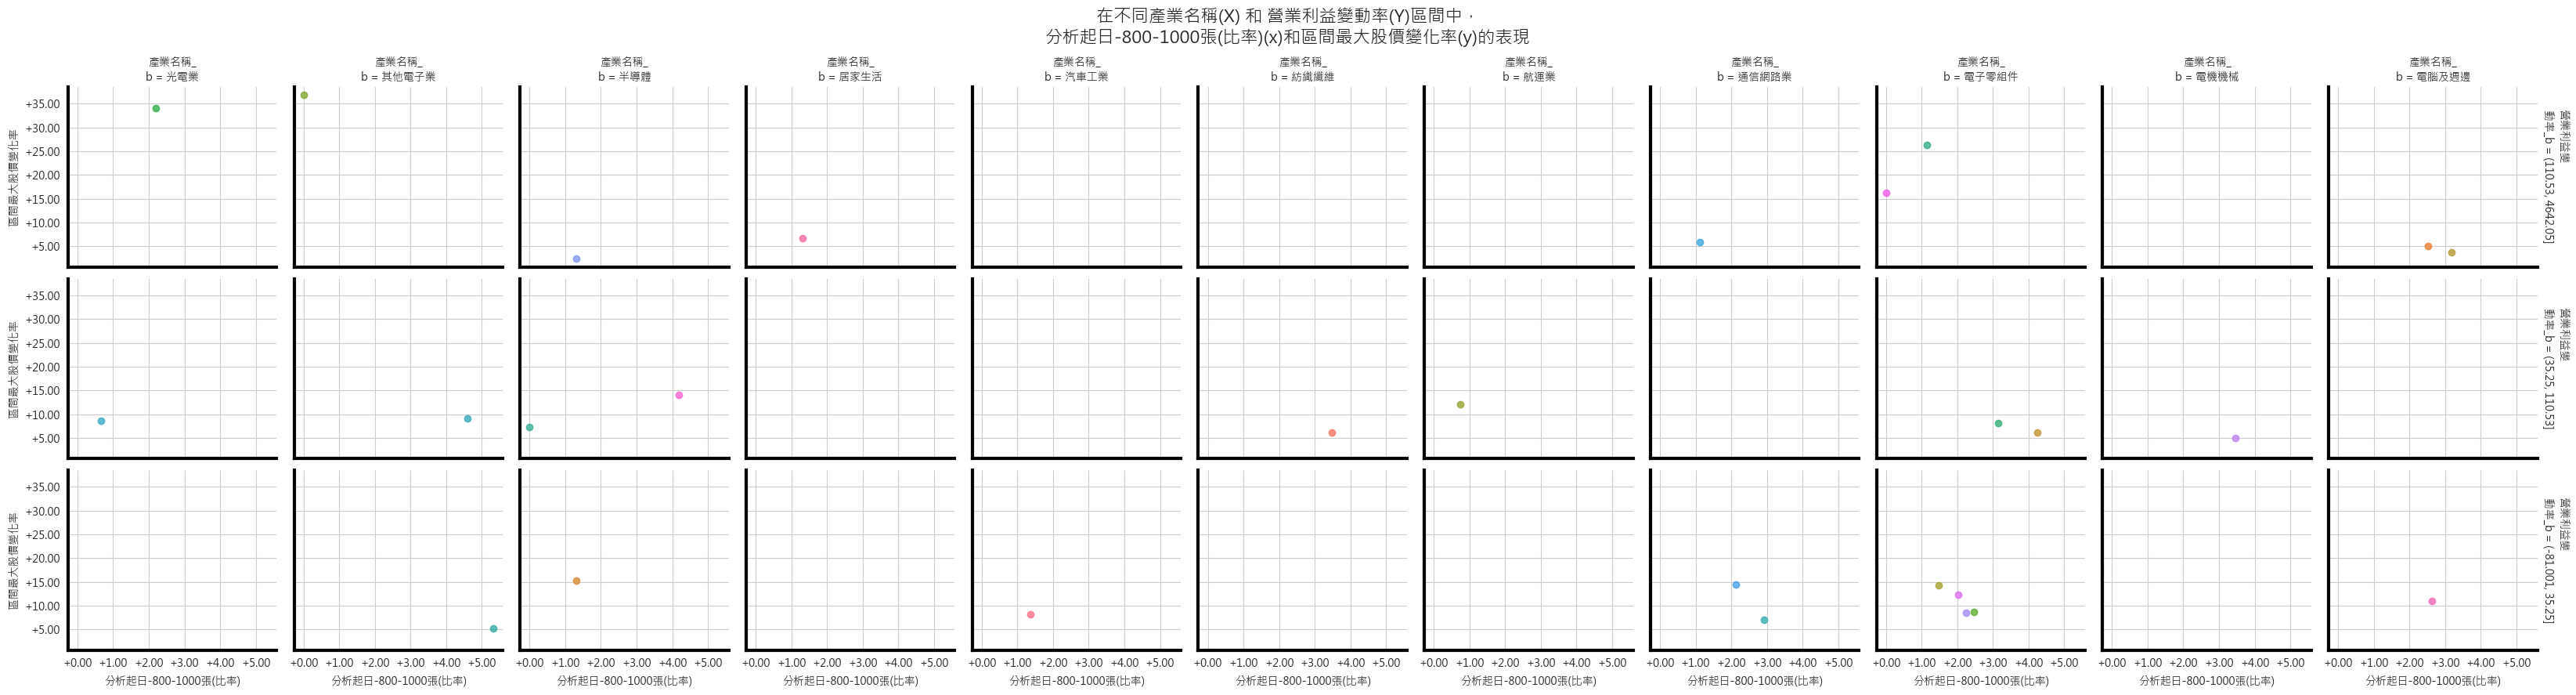

稅前淨利成
長率_b
產業名稱_
b


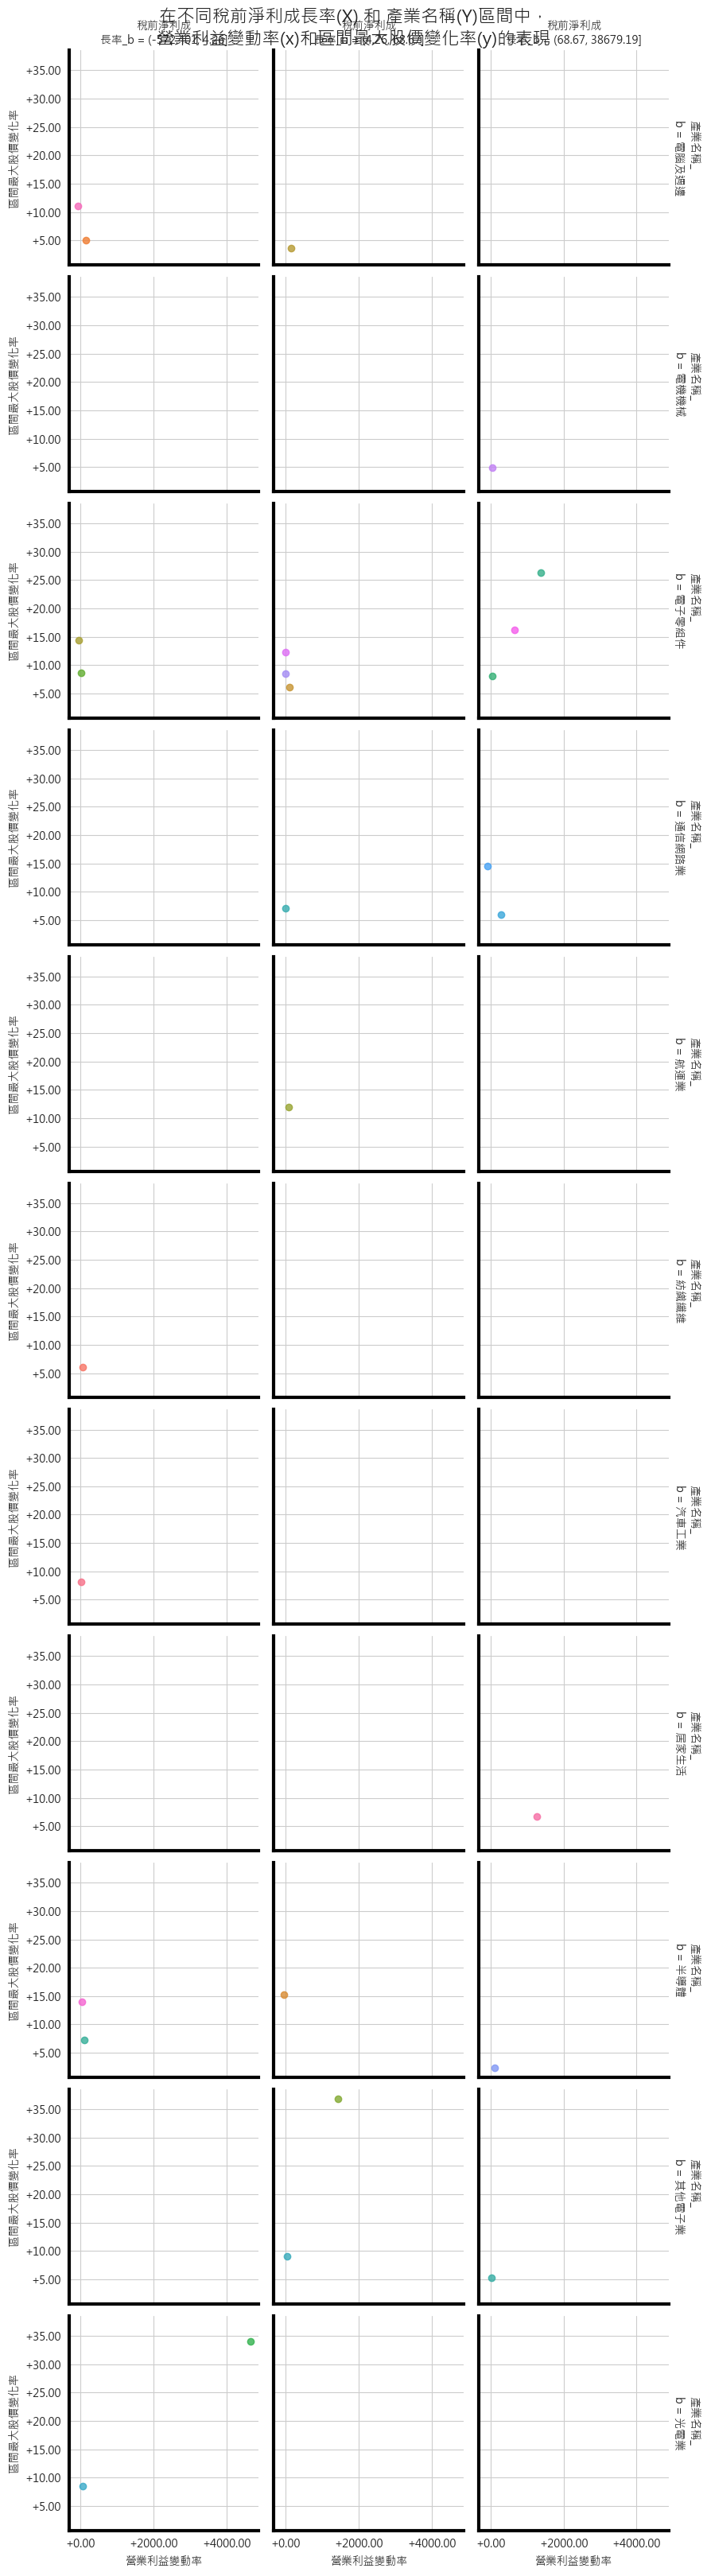

產業名稱_
b
營業利益變
動率_b


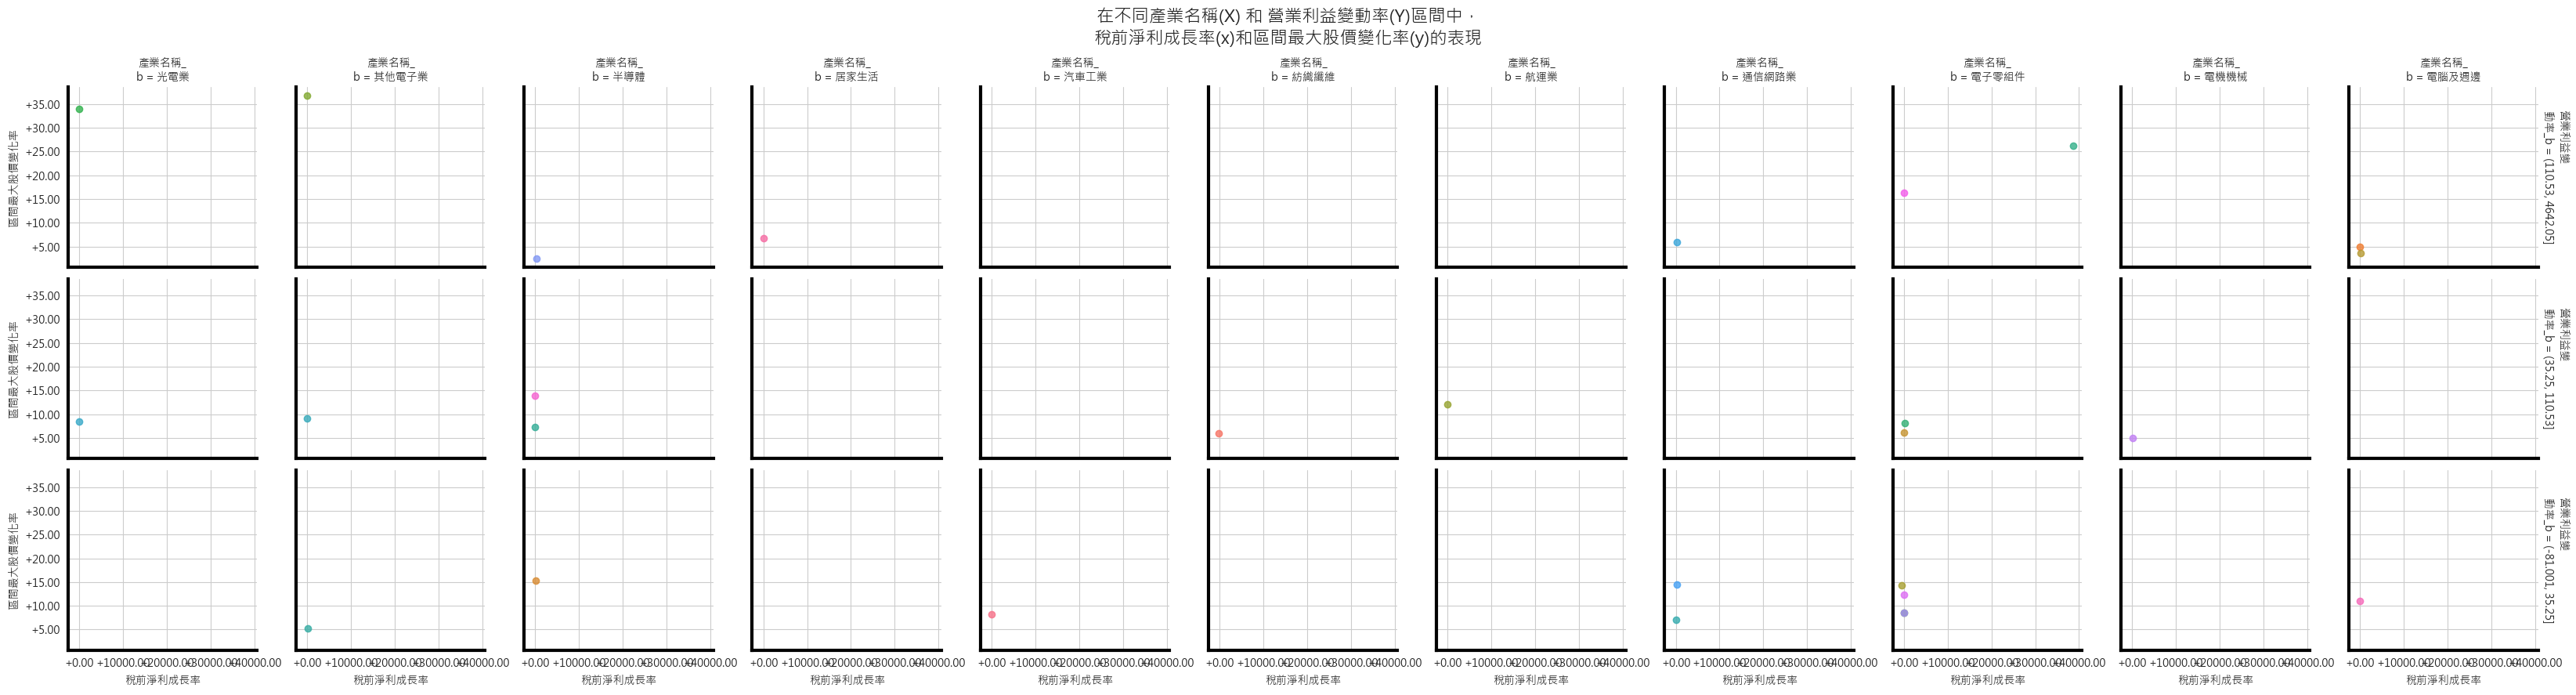

營業利益成
長率_b
分析起日-
800-1000張(比率)_b


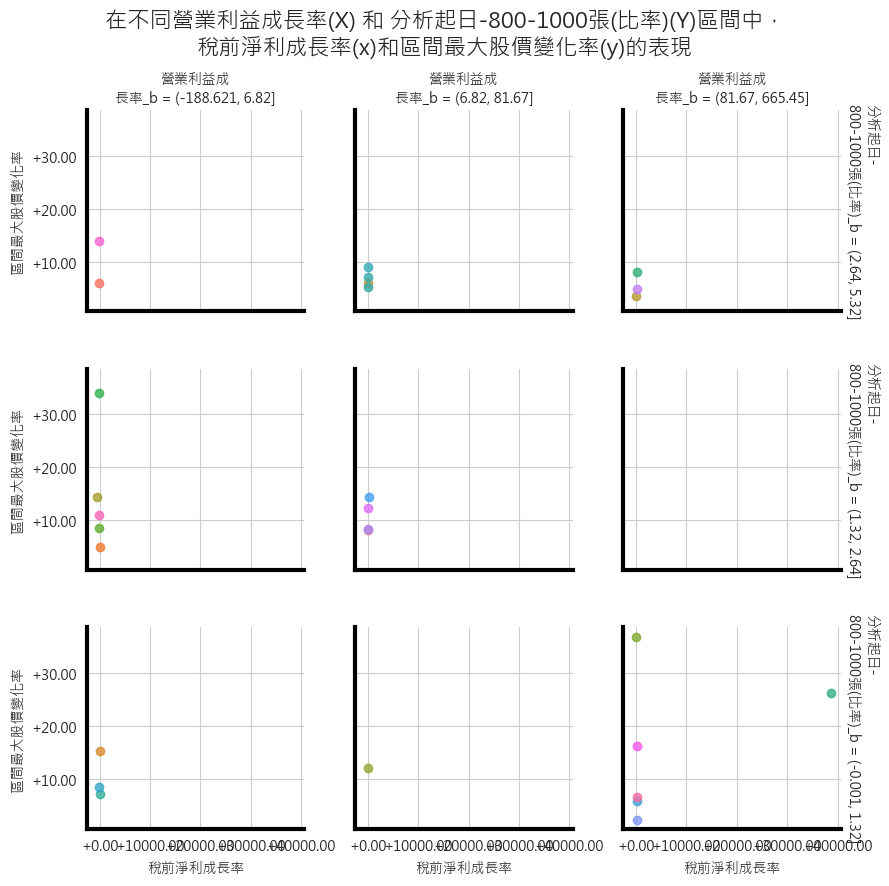

分析起日-
800-1000張(比率)_b
稅前淨利成
長率_b


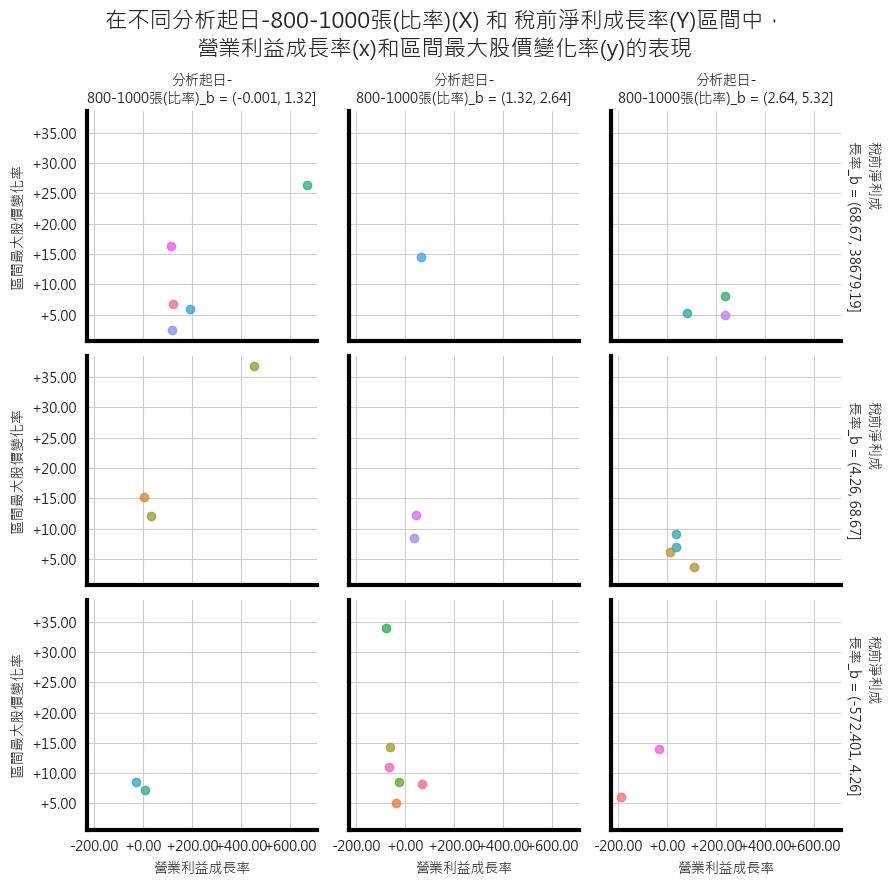

稅前淨利成
長率_b
營業利益成
長率_b


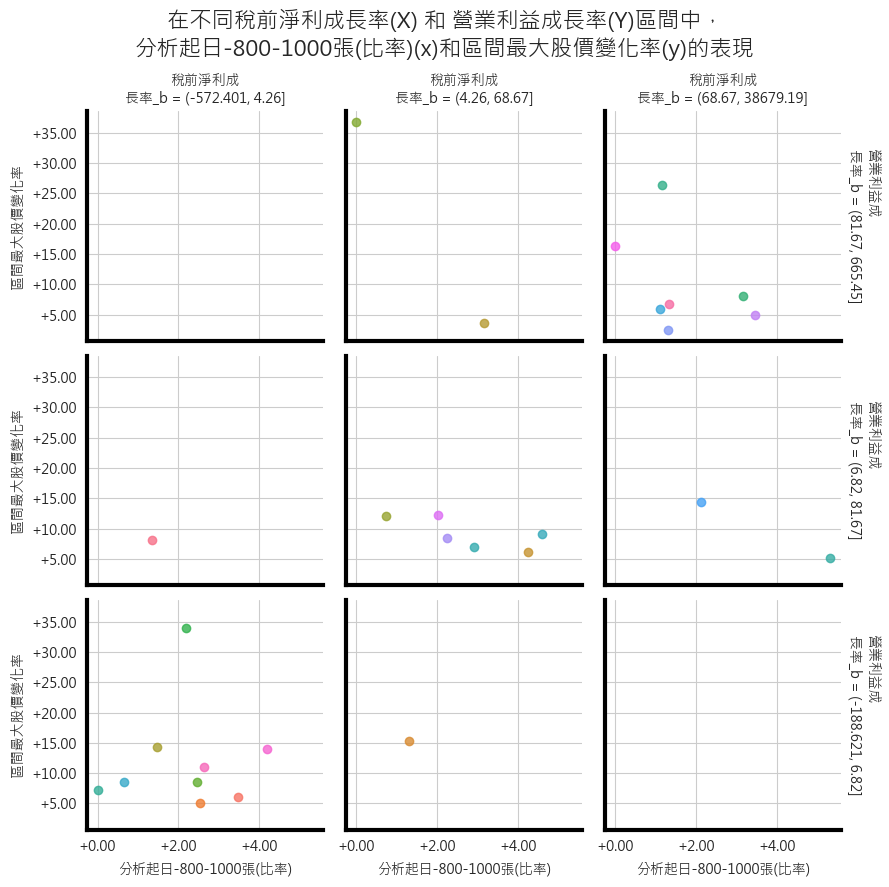

分析起日-
800-1000張(比率)_b
產業名稱_
b


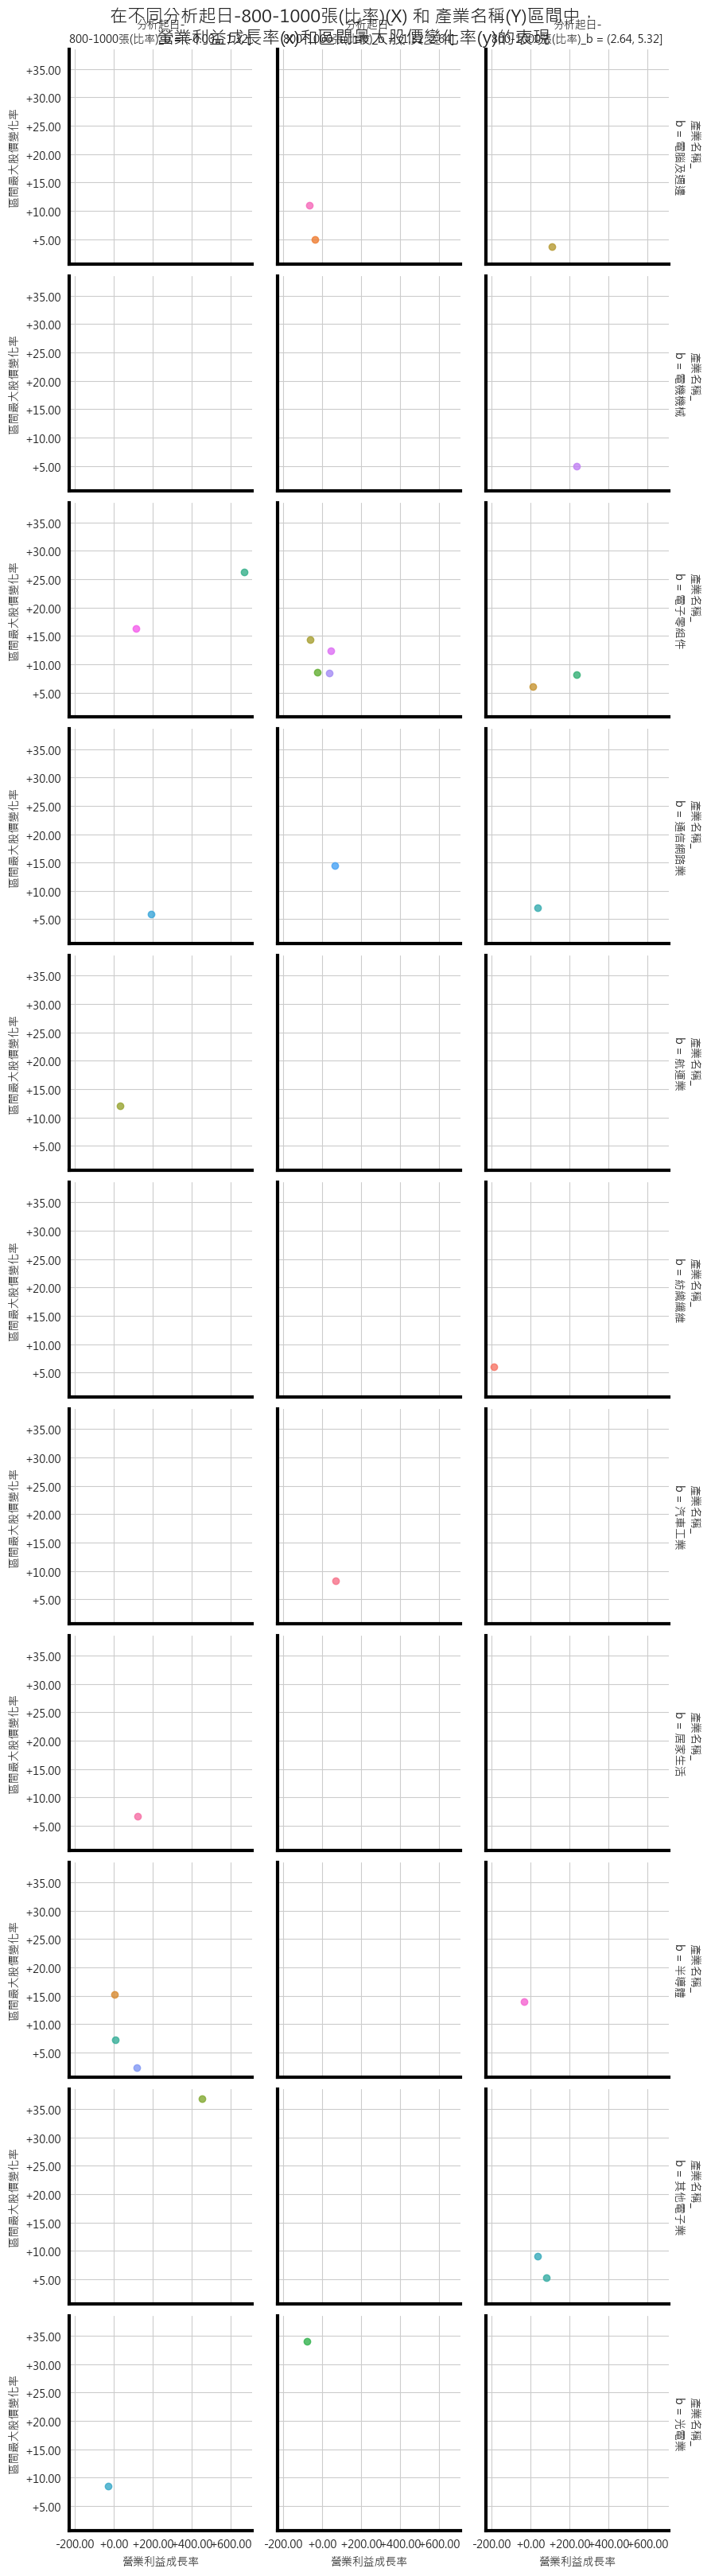

產業名稱_
b
營業利益成
長率_b


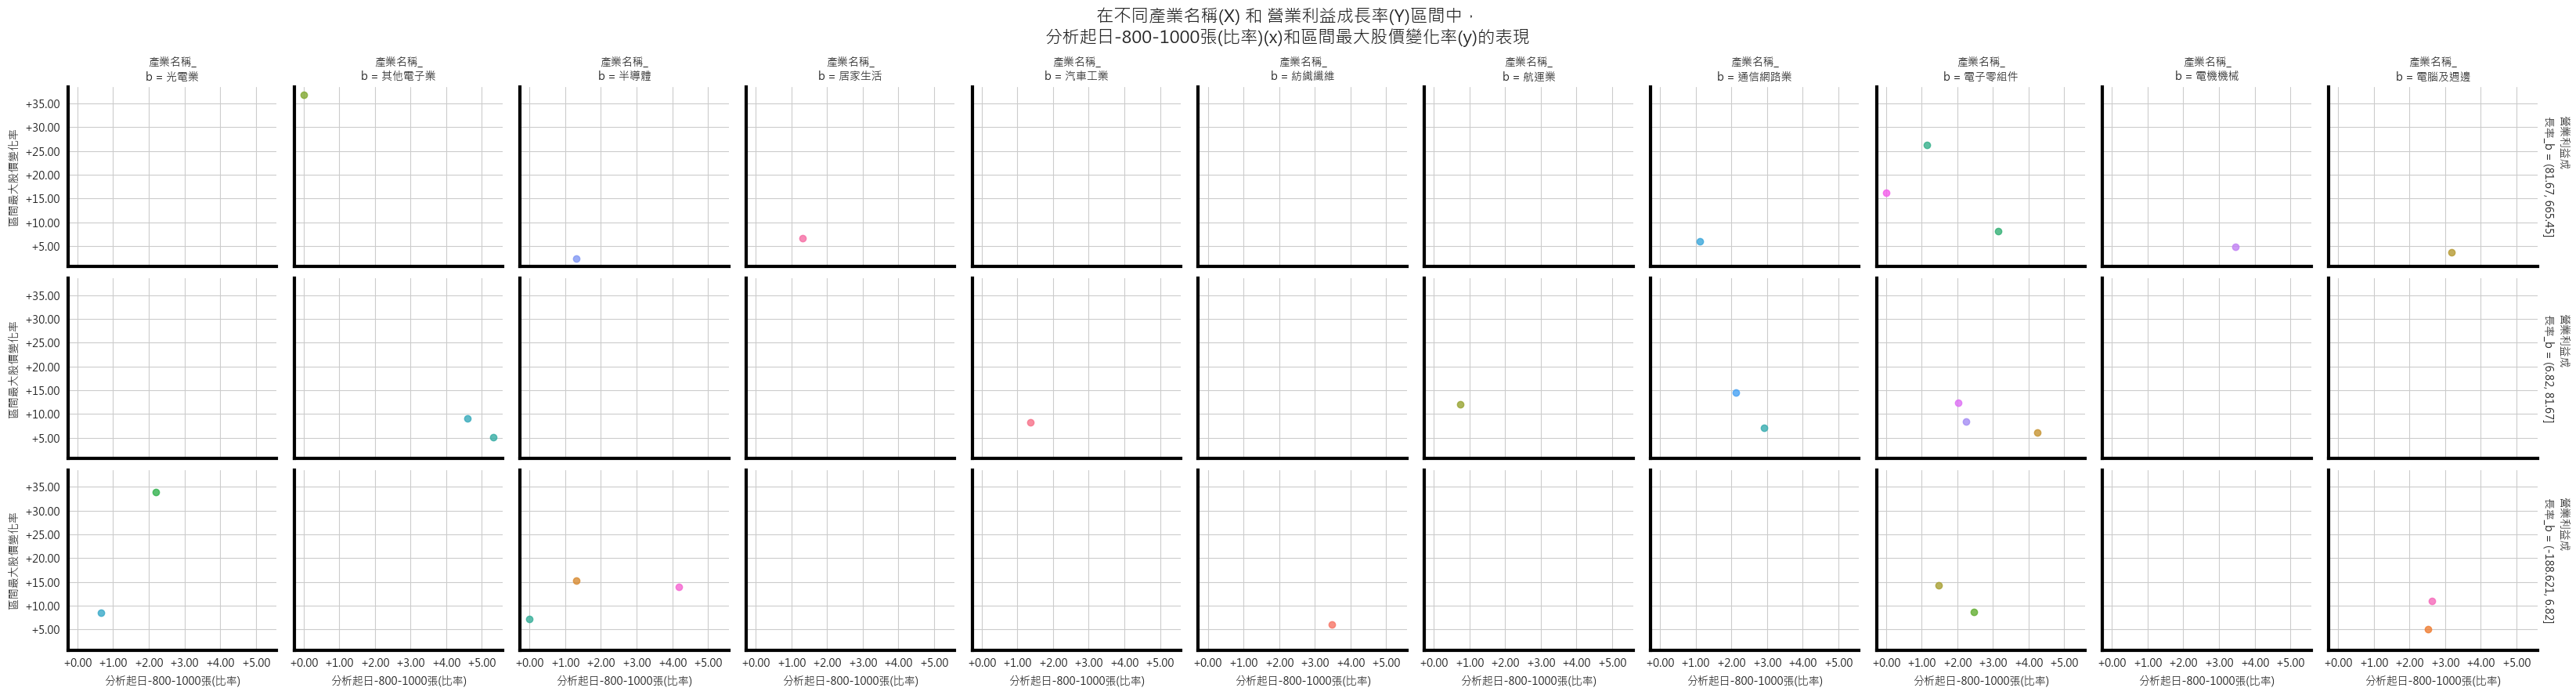

稅前淨利成
長率_b
產業名稱_
b


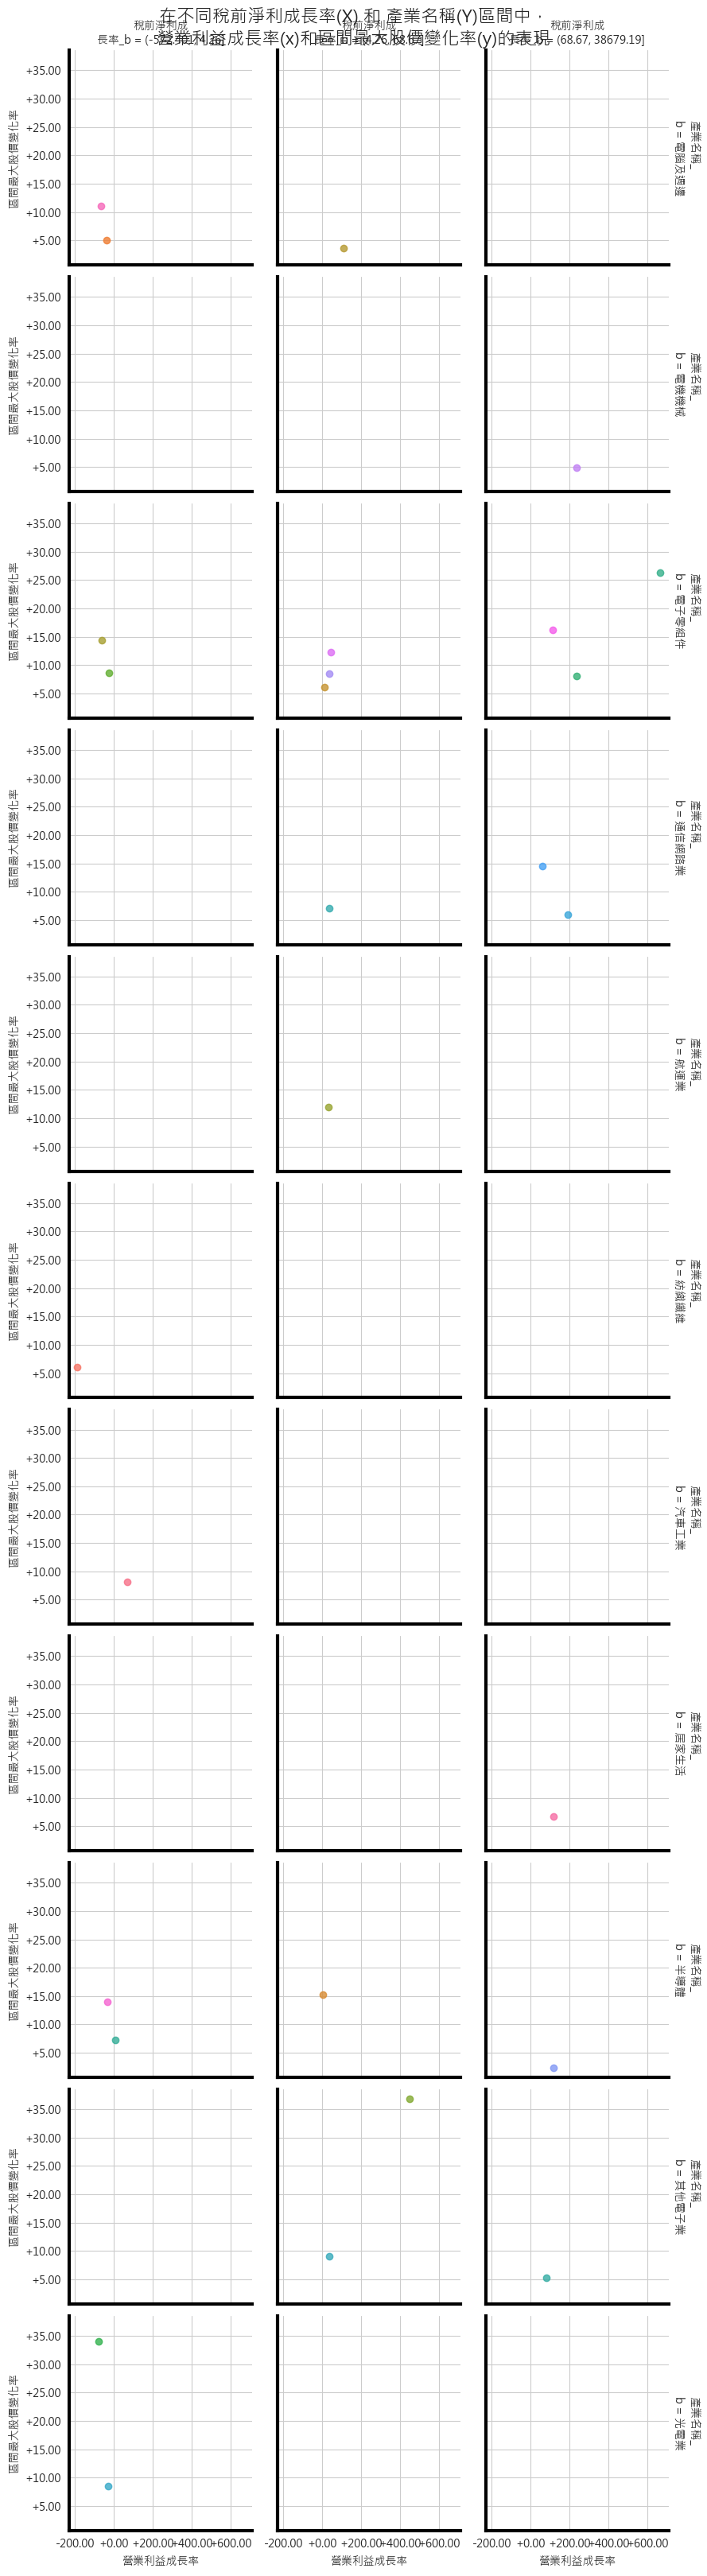

產業名稱_
b
營業利益成
長率_b


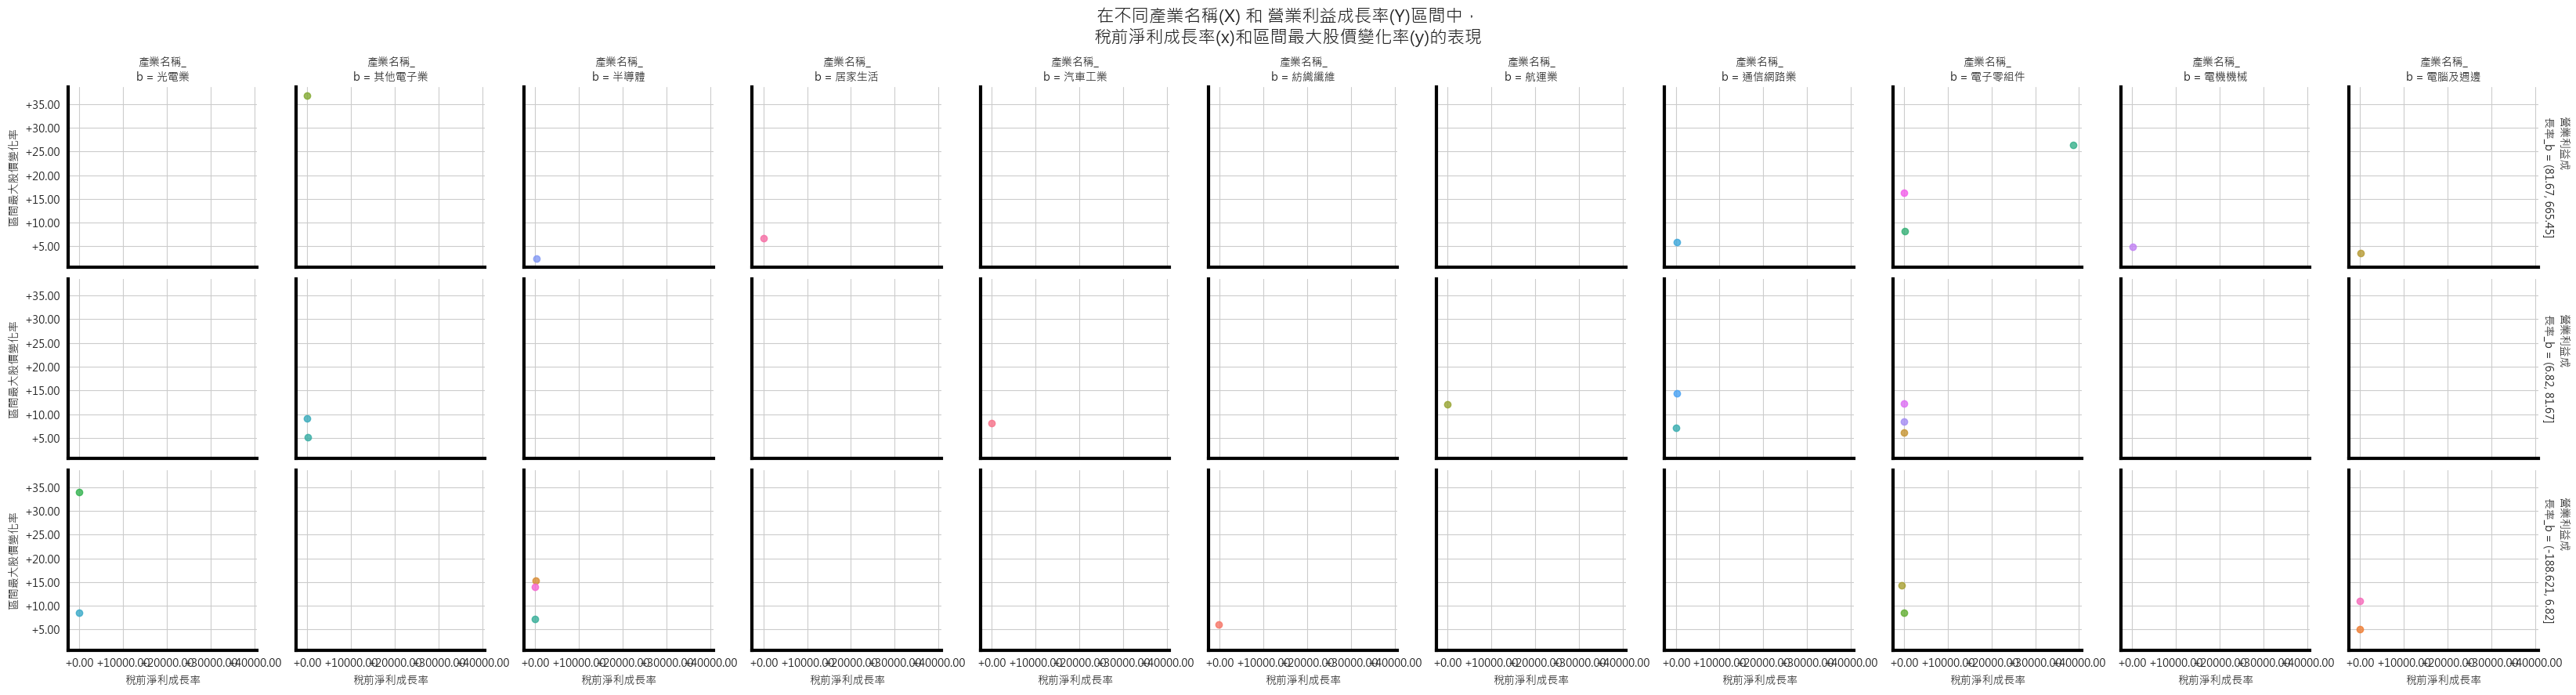

稅前淨利成
長率_b
產業名稱_
b


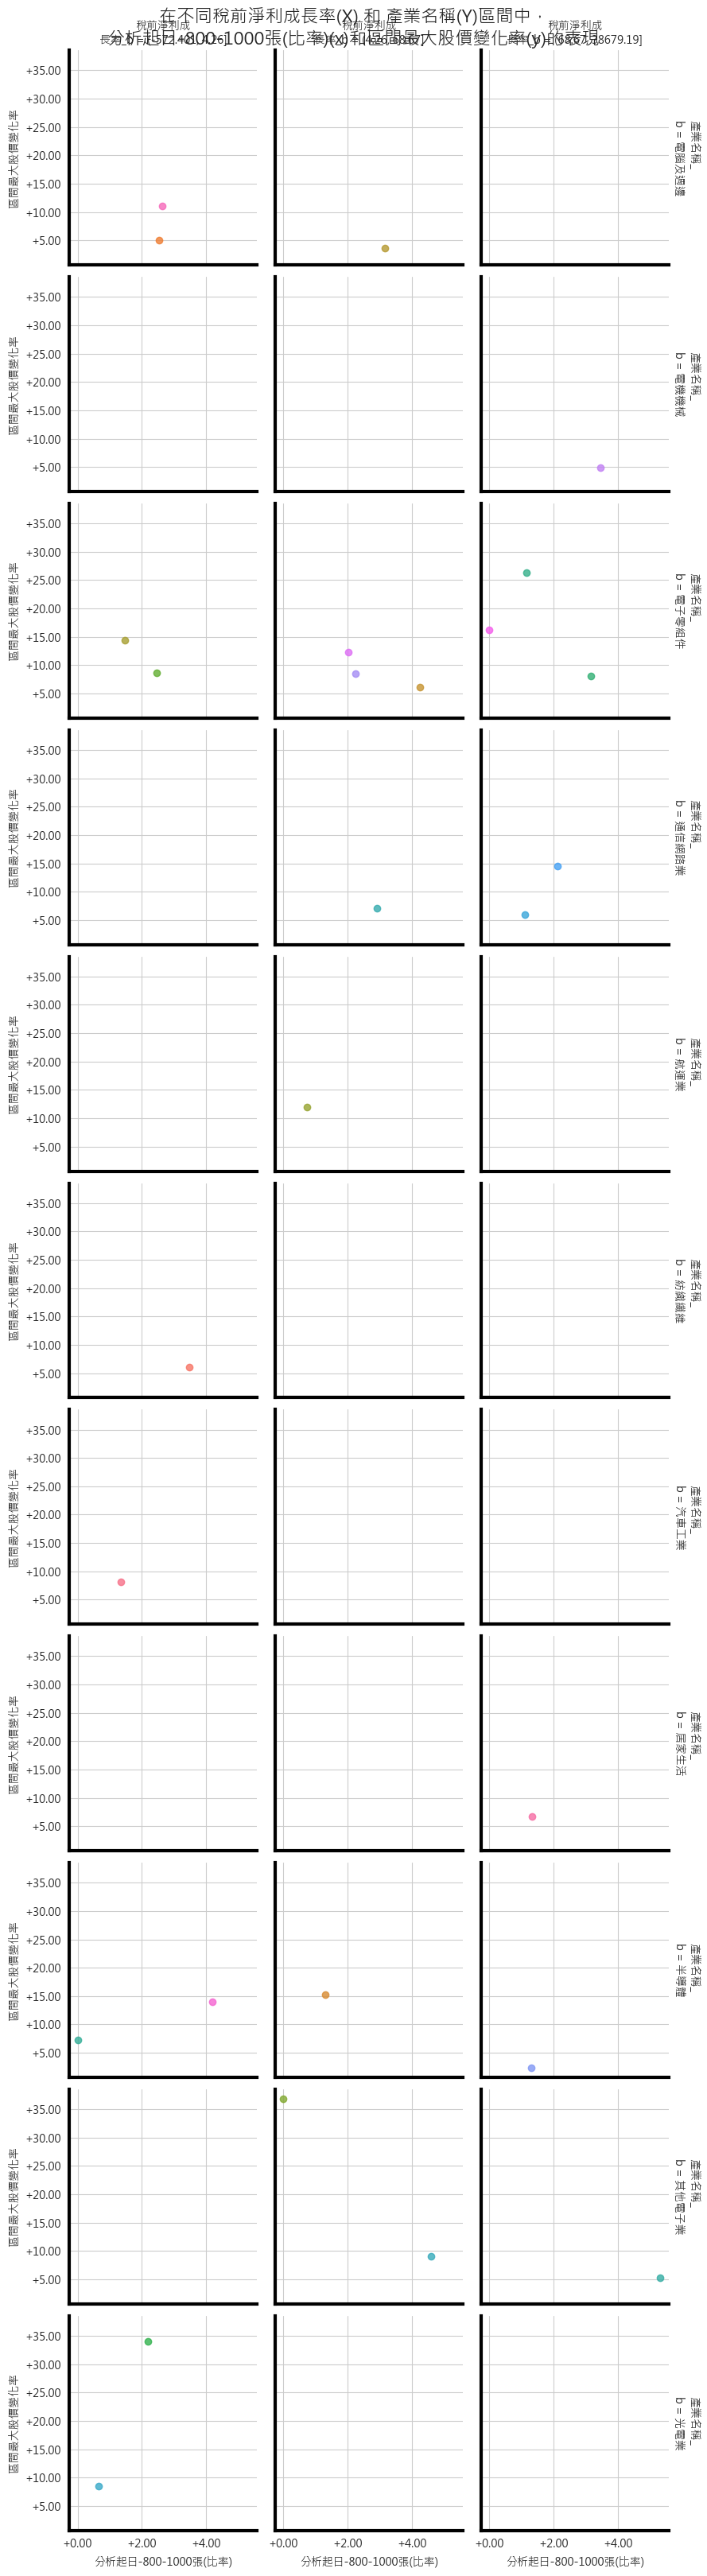

產業名稱_
b
分析起日-
800-1000張(比率)_b


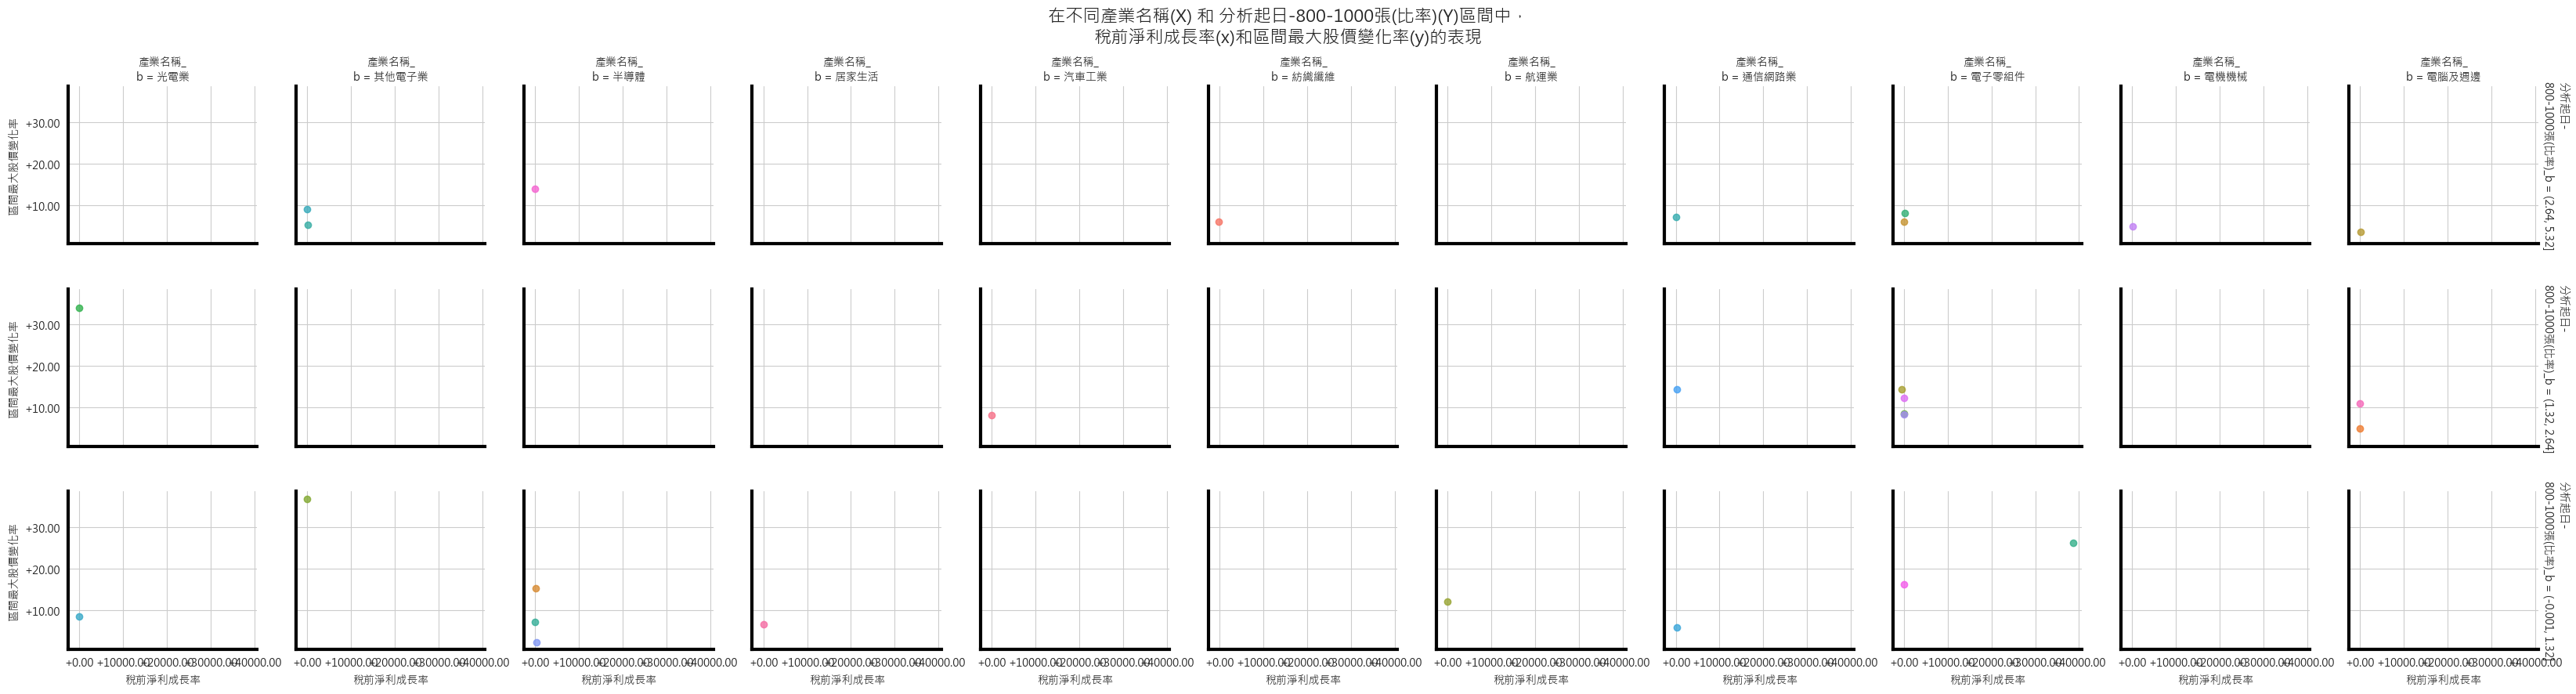

In [8]:
# #畫facegrid
VisualizationEngine.SelectedFeatureVisualizer()

In [9]:
features

{'營業利益變動率': '數值',
 '營業利益成長率': '數值',
 '分析起日-800-1000張(比率)': '數值',
 '稅前淨利成長率': '數值',
 '產業名稱': '類別'}

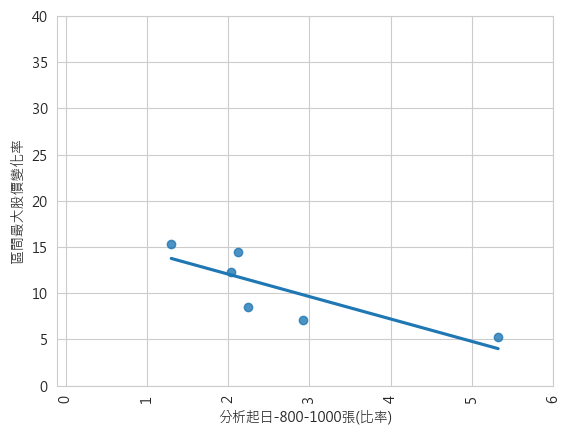

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# 3.3.3
data = filtered_data[(filtered_data['稅前淨利成長率']>4.26) & (filtered_data['營業利益變動率'] <=35.25)]
# data = filtered_data[(5.05 < filtered_data['最高價當日-融券餘額(張)變化率']) & (filtered_data['最高價當日-融券餘額(張)變化率'] <= 67.26) & (0.213 < filtered_data['最高價當日-1000張以上(比率)變化']) & (filtered_data['最高價當日-1000張以上(比率)變化'] <= 0.7)]
fig = plt.figure()
ax = sns.regplot(x='分析起日-800-1000張(比率)', y='區間最大股價變化率', data=data,ci=0)
plt.xticks(rotation=90)
ax.set_xlim(-0.1,6)
ax.set_ylim(0, 40)
plt.show()
